## [미니프로젝트] 악성사이트 탐지 머신러닝 모델 개발

## <b>[2단계] 데이터 분석 및 전처리

## ▣ 데이터 소개
* 학습 데이터셋 : train_dataset.csv
<br>

## ▣ 학습 데이터셋의 변수 소개

* url_len : URL 길이
* url_num_hypens_dom : URL내 '-'(하이픈) 개수
* url_path_len : URL의 경로 길이
* url_domain_len : URL의 도메인 길이
* url_host_name : URL의 hostname 길이
* url_num_dots : URL내 '.'(닷) 개수
* url_num_underscores : URL내 '_'(언더바) 개수
* url_query_len : URL쿼리 길이
* url_num_query_para : URL쿼리의 파라미터 개수
* url_ip_present : URL내 IP표시 여부
* url_entropy : URL 복잡도
* url_chinese_present : URL내 중국어 표기 여부
* url_port : URL내 포트 표기 여부
* html_num_tags('iframe') : HTML내 'iframe' 태그 개수
* html_num_tags('script') : HTML내 'script' 태그 개수
* html_num_tags('embed') : HTML내 'embed' 태그 개수
* html_num_tags('object') : HTML내 'object' 태그 개수
* html_num_tags('div') : HTML내 'div' 태그 개수
* html_num_tags('head') : HTML내 'head' 태그 개수
* html_num_tags('body') : HTML내 'body' 태그 개수
* html_num_tags('form') : HTML내 'form' 태그 개수
* html_num_tags('a') : HTML내 'a' 태그 개수
* html_num_tags('applet') : HTML내 'applet' 태그 개수
* Result_v1 : 악성사이트 여부 컬럼 ( 'malicious'는 악성사이트, 'benign'은 정상사이트 )

<br>

---

### **[프로세스]**
0. 라이브러리 import 및 데이터 불러오기
1. 데이터 분석하기
2. 데이터 전처리하기


---

# <b>Step 0. 라이브러리 import 및 데이터 불러오기
### **가. 라이브러리 import**

In [10]:
#EDA에 사용할 라이브러리를 import 하세요
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as spst
from statsmodels.graphics.mosaicplot import mosaic
import statsmodels.api as sm

### **나.  학습데이터 불러오기**

In [9]:
data = pd.read_csv('train_dataset.csv', delimiter=',')

In [3]:
data

,Unnamed: 0,url_len,url_num_hyphens_dom,url_path_len,url_domain_len,url_hostname_len,url_num_dots,url_num_underscores,url_query_len,url_num_query_para,...,html_num_tags('iframe'),html_num_tags('script'),html_num_tags('embed'),html_num_tags('object'),html_num_tags('div'),html_num_tags('head'),html_num_tags('body'),html_num_tags('form'),html_num_tags('a'),html_num_tags('applet')
0,0,97,0,80.0,17.0,17.0,4,0,0,0,...,0,5.0,0,0,12,1,1,1.0,3.0,0
1,1,37,0,22.0,15.0,15.0,3,1,0,0,...,1,NaN,0,0,158,1,1,NaN,NaN,0
2,2,44,0,NaN,20.0,20.0,3,3,0,0,...,0,6.0,3,3,34,1,1,0.0,136.0,0
3,3,40,0,14.0,26.0,26.0,2,0,0,0,...,0,NaN,0,0,29,1,1,1.0,2.0,0
4,4,43,2,NaN,26.0,26.0,2,0,0,0,...,0,NaN,0,0,41,1,1,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2436,2436,63,0,NaN,17.0,NaN,4,2,0,0,...,1,18.0,0,0,79,1,1,1.0,119.0,0
2437,2437,36,0,1.0,35.0,35.0,2,0,0,0,...,0,27.0,0,0,57,1,1,1.0,NaN,0
2438,2438,45,1,23.0,22.0,NaN,2,0,0,0,...,0,8.0,0,0,199,1,1,2.0,NaN,0
2439,2439,24,0,10.0,14.0,NaN,3,0,0,0,...,0,3.0,0,0,90,1,1,2.0,25.0,0


# <b>Step 1. 데이터 분석하기
---

단변량 분석은 데이터분석의 매우 기초적인 분석기법으로, 독립적인 개별 변수가 가지고있는 특성들을 이해하는 과정입니다.

## <b>Q1. 데이터 단변량 분석하기

<span style="color: green"> 개별 변수에 대해 아래 사항들을 분석해보세요. </span>

1. 변수가 내포하고 있는 의미
2. 변수가 수치형인지, 범주형인지
3. 결측치 존재 여부 및 조치 방안
4. 기초 통계량 확인
5. 데이터 분포 확인
6. 위 정보로부터 파악한 내용 정리
7. 추가 분석사항 도출

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2441 entries, 0 to 2440
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               2441 non-null   int64  
 1   url_len                  2441 non-null   int64  
 2   url_num_hyphens_dom      2441 non-null   int64  
 3   url_path_len             1975 non-null   float64
 4   url_domain_len           1975 non-null   float64
 5   url_hostname_len         1978 non-null   float64
 6   url_num_dots             2441 non-null   int64  
 7   url_num_underscores      2441 non-null   int64  
 8   url_query_len            2441 non-null   int64  
 9   url_num_query_para       2441 non-null   int64  
 10  url_ip_present           2441 non-null   int64  
 11  url_entropy              2441 non-null   float64
 12  url_chinese_present      2441 non-null   int64  
 13  url_port                 2441 non-null   int64  
 14  html_num_tags('iframe') 

### 0. Result_v1 : 악성사이트 여부 컬럼 ( 'malicious'는 악성사이트, 'benign'은 정상사이트 )

In [6]:
target = 'Result_v1'

##### 1. 변수가 내포하고 있는 의미

In [ ]:
'malicious'는 악성사이트, 'benign'은 정상사이트

##### 2. 변수가 수치형인지, 범주형인지

In [ ]:
범주형

##### 3. 결측치 존재 여부 및 조치 방안

In [10]:
data[target].isna().sum()

0

##### 4. 기초 통계량 확인

In [15]:
data[target].describe()

count       3664
unique         2
top       benign
freq        1858
Name: Result_v1, dtype: object

In [19]:
temp = data[target].value_counts()
temp

benign       1858
malicious    1806
Name: Result_v1, dtype: int64

##### 5. 데이터 분포 확인

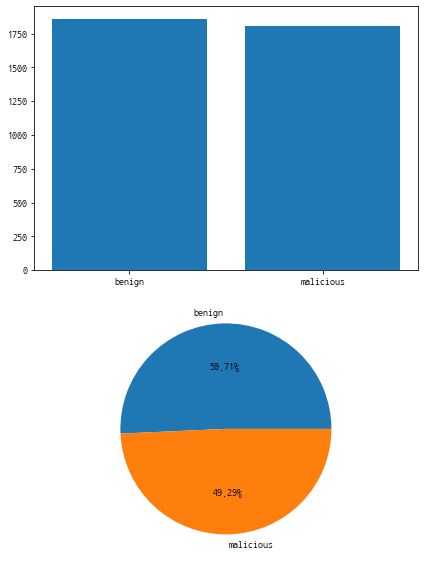

In [20]:
plt.figure(figsize = (6, 8))
plt.subplot(2,1,1)
plt.bar(temp.index, temp.values)

plt.subplot(2,1,2)
plt.pie(temp.values, labels = temp.index, autopct = '%.2f%%')

plt.tight_layout()
plt.show()

##### 6. 위 정보로부터 파악한 내용 정리

In [ ]:
악성 사이트와 정상사이트 데이터가 거의 반반씩 있다.

##### 7. 추가 분석사항 도출

In [195]:
data[target] = data[target].map({'benign' : 0, 'malicious' : 1})

In [196]:
data.head()

,Unnamed: 0,url_len,url_num_hyphens_dom,url_path_len,url_domain_len,url_hostname_len,url_num_dots,url_num_underscores,url_query_len,url_num_query_para,...,html_num_tags('script'),html_num_tags('embed'),html_num_tags('object'),html_num_tags('div'),html_num_tags('head'),html_num_tags('body'),html_num_tags('form'),html_num_tags('a'),html_num_tags('applet'),Result_v1
0,0,23.0,0.0,8.0,15.0,15.0,2.0,0.0,0.0,0.0,...,7.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1
1,1,75.0,0.0,58.0,17.0,17.0,6.0,0.0,0.0,0.0,...,18.0,0.0,0.0,20.0,1.0,1.0,0.0,21.0,0.0,0
2,2,20.0,0.0,4.0,16.0,16.0,2.0,0.0,0.0,0.0,...,33.0,0.0,0.0,101.0,1.0,1.0,3.0,70.0,0.0,0
3,3,27.0,0.0,13.0,14.0,14.0,3.0,0.0,0.0,0.0,...,15.0,0.0,0.0,151.0,1.0,1.0,1.0,55.0,0.0,0
4,4,39.0,2.0,12.0,27.0,27.0,2.0,0.0,0.0,0.0,...,10.0,0.0,0.0,332.0,1.0,1.0,0.0,321.0,0.0,0


### 1. url_len : URL 길이

In [21]:
feature = 'url_len'

##### 1. 변수가 내포하고 있는 의미

In [ ]:
URL 길이

##### 2. 변수가 수치형인지, 범주형인지

In [ ]:
수치형

##### 3. 결측치 존재 여부 및 조치 방안

In [22]:
data[feature].isnull().sum()

0

##### 4. 기초 통계량 확인

In [23]:
data[feature].describe()

count    3664.000000
mean       54.559225
std        82.493265
min         6.000000
25%        24.000000
50%        36.000000
75%        55.000000
max      1837.000000
Name: url_len, dtype: float64

##### 5. 데이터 분포 확인

C:\Users\Wslee\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


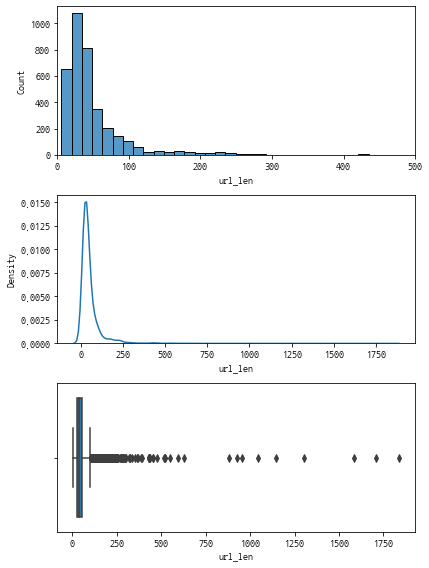

In [27]:
plt.figure(figsize = (6,8))
plt.subplot(3,1,1)
plt.xlim(0, 500)
sns.histplot(data[feature], bins = 128)

plt.subplot(3,1,2)
sns.kdeplot(data[feature])

plt.subplot(3,1,3)
sns.boxplot(data[feature])

plt.tight_layout()
plt.show()

##### 6. 위 정보로부터 파악한 내용 정리

In [ ]:
url 길이는 대부분 100 밑이다.
평균은 36

##### 7. 추가 분석사항 도출

### 2. url_num_hyphens_dom : URL내 '-'(하이픈) 개수

In [33]:
feature = 'url_num_hyphens_dom'

##### 1. 변수가 내포하고 있는 의미

In [ ]:
URL내 '-'(하이픈) 개수

##### 2. 변수가 수치형인지, 범주형인지

In [ ]:
수치형

##### 3. 결측치 존재 여부 및 조치 방안

In [34]:
data[feature].isnull().sum()

0

##### 4. 기초 통계량 확인

In [35]:
data[feature].describe()

count    3664.000000
mean        0.412937
std         0.847058
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max        14.000000
Name: url_num_hyphens_dom, dtype: float64

##### 5. 데이터 분포 확인

C:\Users\Wslee\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='url_num_hyphens_dom'>

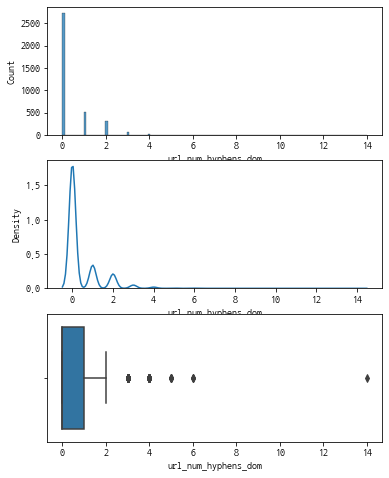

In [36]:
plt.figure(figsize = (6,8))
plt.subplot(3,1,1)
sns.histplot(data[feature], bins = 128)

plt.subplot(3,1,2)
sns.kdeplot(data[feature])

plt.subplot(3,1,3)
sns.boxplot(data[feature])

##### 6. 위 정보로부터 파악한 내용 정리

In [ ]:
-이 없는 경우가 많다.
-이 있는 경우가 악성사이트인지 분석해보자

##### 7. 추가 분석사항 도출

### 3. url_path_len : URL의 경로 길이

In [37]:
feature = 'url_path_len'

##### 1. 변수가 내포하고 있는 의미

In [ ]:
URL의 경로 길이

##### 2. 변수가 수치형인지, 범주형인지

##### 3. 결측치 존재 여부 및 조치 방안

In [38]:
data[feature].isnull().sum()

1

In [42]:
data.loc[data[feature].isnull(), :]

,Unnamed: 0,url_len,url_num_hyphens_dom,url_path_len,url_domain_len,url_hostname_len,url_num_dots,url_num_underscores,url_query_len,url_num_query_para,...,html_num_tags('script'),html_num_tags('embed'),html_num_tags('object'),html_num_tags('div'),html_num_tags('head'),html_num_tags('body'),html_num_tags('form'),html_num_tags('a'),html_num_tags('applet'),Result_v1
1628,1628,24.0,0.0,NaN,14.0,14.0,4.0,0.0,0.0,0.0,...,3.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,benign


In [43]:
data.head()

,Unnamed: 0,url_len,url_num_hyphens_dom,url_path_len,url_domain_len,url_hostname_len,url_num_dots,url_num_underscores,url_query_len,url_num_query_para,...,html_num_tags('script'),html_num_tags('embed'),html_num_tags('object'),html_num_tags('div'),html_num_tags('head'),html_num_tags('body'),html_num_tags('form'),html_num_tags('a'),html_num_tags('applet'),Result_v1
0,0,23.0,0.0,8.0,15.0,15.0,2.0,0.0,0.0,0.0,...,7.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,malicious
1,1,75.0,0.0,58.0,17.0,17.0,6.0,0.0,0.0,0.0,...,18.0,0.0,0.0,20.0,1.0,1.0,0.0,21.0,0.0,benign
2,2,20.0,0.0,4.0,16.0,16.0,2.0,0.0,0.0,0.0,...,33.0,0.0,0.0,101.0,1.0,1.0,3.0,70.0,0.0,benign
3,3,27.0,0.0,13.0,14.0,14.0,3.0,0.0,0.0,0.0,...,15.0,0.0,0.0,151.0,1.0,1.0,1.0,55.0,0.0,benign
4,4,39.0,2.0,12.0,27.0,27.0,2.0,0.0,0.0,0.0,...,10.0,0.0,0.0,332.0,1.0,1.0,0.0,321.0,0.0,benign


In [ ]:
url_path_len = url_len - url_domain_len 으로 구할수 있는것 같다.

In [52]:
data.loc[data[feature].isnull(), 'url_path_len'] = data.loc[data[feature].isnull(), 'url_len'] - data.loc[data[feature].isnull(), 'url_domain_len']

In [55]:
data.loc[1628, 'url_path_len']

10.0

In [56]:
data[feature].isnull().sum()

0

##### 4. 기초 통계량 확인

In [57]:
data[feature].describe()

count    3664.000000
mean       29.360535
std        78.585170
min         0.000000
25%         1.000000
50%        13.000000
75%        31.000000
max      1816.000000
Name: url_path_len, dtype: float64

##### 5. 데이터 분포 확인

C:\Users\Wslee\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


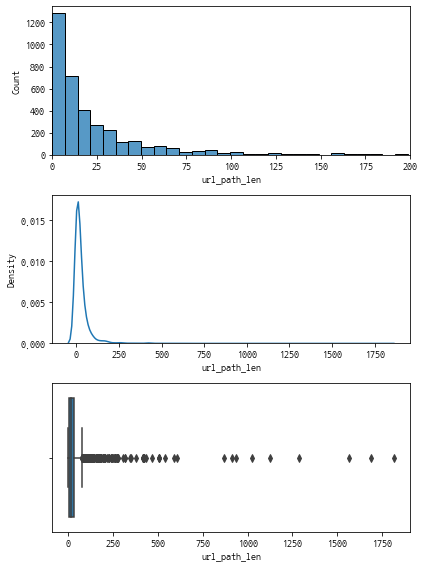

In [64]:
plt.figure(figsize = (6,8))
plt.subplot(3,1,1)
plt.xlim(0, 200)
sns.histplot(data[feature], bins = 256)

plt.subplot(3,1,2)
sns.kdeplot(data[feature])

plt.subplot(3,1,3)
sns.boxplot(data[feature])

plt.tight_layout()
plt.show()

##### 6. 위 정보로부터 파악한 내용 정리

In [ ]:
대부분의 데이터가 50 밑에 있음
평균 29

##### 7. 추가 분석사항 도출

### 4. url_domain_len : URL의 도메인 길이

In [66]:
feature = 'url_domain_len'

##### 1. 변수가 내포하고 있는 의미

In [ ]:
도메인 길이

##### 2. 변수가 수치형인지, 범주형인지

In [ ]:
수치형이다.

##### 3. 결측치 존재 여부 및 조치 방안

In [67]:
data[feature].isnull().sum()

1

In [69]:
data.loc[data[feature].isnull(), :]

,Unnamed: 0,url_len,url_num_hyphens_dom,url_path_len,url_domain_len,url_hostname_len,url_num_dots,url_num_underscores,url_query_len,url_num_query_para,...,html_num_tags('script'),html_num_tags('embed'),html_num_tags('object'),html_num_tags('div'),html_num_tags('head'),html_num_tags('body'),html_num_tags('form'),html_num_tags('a'),html_num_tags('applet'),Result_v1
1084,1084,37.0,2.0,0.0,NaN,37.0,2.0,0.0,0.0,0.0,...,8.0,0.0,0.0,211.0,1.0,1.0,2.0,122.0,0.0,benign


In [ ]:
url_domain_len = url_len - url_path_len 으로 구할수 있는것 같다.

In [70]:
data.loc[data[feature].isnull(), 'url_domain_len'] = data.loc[data[feature].isnull(), 'url_len'] - data.loc[data[feature].isnull(), 'url_path_len']

In [72]:
data.loc[1084, 'url_domain_len']

37.0

##### 4. 기초 통계량 확인

In [73]:
data[feature].describe()

count    3664.000000
mean       20.387828
std         9.599628
min         4.000000
25%        14.000000
50%        17.000000
75%        24.000000
max       109.000000
Name: url_domain_len, dtype: float64

##### 5. 데이터 분포 확인

C:\Users\Wslee\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


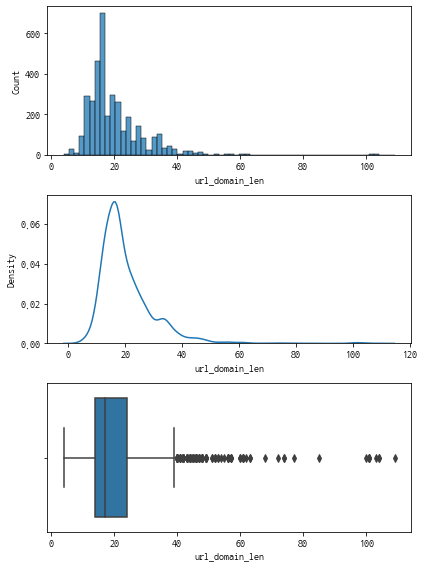

In [74]:
plt.figure(figsize = (6,8))
plt.subplot(3,1,1)
sns.histplot(data[feature], bins = 64)

plt.subplot(3,1,2)
sns.kdeplot(data[feature])

plt.subplot(3,1,3)
sns.boxplot(data[feature])

plt.tight_layout()
plt.show()

##### 6. 위 정보로부터 파악한 내용 정리

In [ ]:
평균 20, 24밑으로 대부분 존재한다.

##### 7. 추가 분석사항 도출

### 5. url_hostname_len : URL의 hostname 길이

In [78]:
feature = 'url_hostname_len'

In [79]:
data.head()

,Unnamed: 0,url_len,url_num_hyphens_dom,url_path_len,url_domain_len,url_hostname_len,url_num_dots,url_num_underscores,url_query_len,url_num_query_para,...,html_num_tags('script'),html_num_tags('embed'),html_num_tags('object'),html_num_tags('div'),html_num_tags('head'),html_num_tags('body'),html_num_tags('form'),html_num_tags('a'),html_num_tags('applet'),Result_v1
0,0,23.0,0.0,8.0,15.0,15.0,2.0,0.0,0.0,0.0,...,7.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,malicious
1,1,75.0,0.0,58.0,17.0,17.0,6.0,0.0,0.0,0.0,...,18.0,0.0,0.0,20.0,1.0,1.0,0.0,21.0,0.0,benign
2,2,20.0,0.0,4.0,16.0,16.0,2.0,0.0,0.0,0.0,...,33.0,0.0,0.0,101.0,1.0,1.0,3.0,70.0,0.0,benign
3,3,27.0,0.0,13.0,14.0,14.0,3.0,0.0,0.0,0.0,...,15.0,0.0,0.0,151.0,1.0,1.0,1.0,55.0,0.0,benign
4,4,39.0,2.0,12.0,27.0,27.0,2.0,0.0,0.0,0.0,...,10.0,0.0,0.0,332.0,1.0,1.0,0.0,321.0,0.0,benign


##### 1. 변수가 내포하고 있는 의미

In [ ]:
URL의 hostname 길이

##### 2. 변수가 수치형인지, 범주형인지

In [ ]:
수치형

##### 3. 결측치 존재 여부 및 조치 방안

In [80]:
data[feature].isnull().sum()

0

##### 4. 기초 통계량 확인

In [82]:
data[feature].describe()

count    3664.000000
mean       20.330513
std         9.628093
min         4.000000
25%        14.000000
50%        17.000000
75%        24.000000
max       109.000000
Name: url_hostname_len, dtype: float64

##### 5. 데이터 분포 확인

C:\Users\Wslee\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


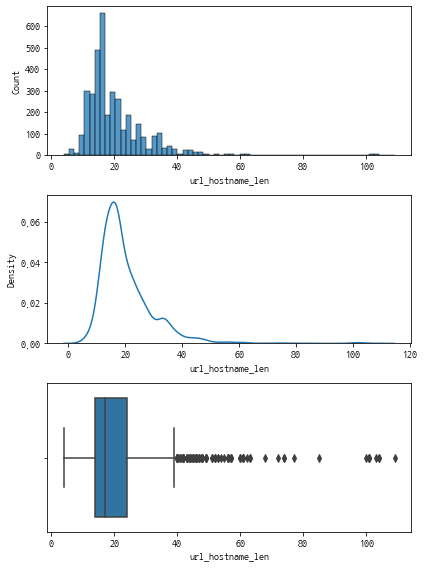

In [81]:
plt.figure(figsize = (6,8))
plt.subplot(3,1,1)
sns.histplot(data[feature], bins = 64)

plt.subplot(3,1,2)
sns.kdeplot(data[feature])

plt.subplot(3,1,3)
sns.boxplot(data[feature])

plt.tight_layout()
plt.show()

##### 6. 위 정보로부터 파악한 내용 정리

In [ ]:
앞의 url_domain_len와 같다. 삭제

##### 7. 추가 분석사항 도출

### 6. url_num_dots : URL내 '.'(닷) 개수

In [83]:
feature = 'url_num_dots'

##### 1. 변수가 내포하고 있는 의미

In [ ]:
URL내 '.'(닷) 개수

##### 2. 변수가 수치형인지, 범주형인지

In [ ]:
수치형

##### 3. 결측치 존재 여부 및 조치 방안

In [84]:
data[feature].isnull().sum()

0

##### 4. 기초 통계량 확인

In [85]:
data[feature].describe()

count    3664.000000
mean        2.516921
std         1.534119
min         1.000000
25%         2.000000
50%         2.000000
75%         3.000000
max        32.000000
Name: url_num_dots, dtype: float64

##### 5. 데이터 분포 확인

C:\Users\Wslee\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


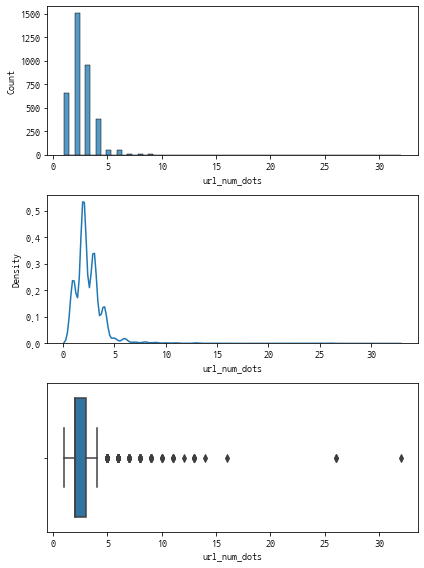

In [86]:
plt.figure(figsize = (6,8))
plt.subplot(3,1,1)
sns.histplot(data[feature], bins = 64)

plt.subplot(3,1,2)
sns.kdeplot(data[feature])

plt.subplot(3,1,3)
sns.boxplot(data[feature])

plt.tight_layout()
plt.show()

##### 6. 위 정보로부터 파악한 내용 정리

In [ ]:
평균 2.5// 2에 제일 많은 데이터가 있다.

##### 7. 추가 분석사항 도출

### 7. url_num_underscores : URL내 '_'(언더바) 개수

In [87]:
feature = 'url_num_underscores'

##### 1. 변수가 내포하고 있는 의미

In [ ]:
URL내 '_'(언더바) 개수

##### 2. 변수가 수치형인지, 범주형인지

In [ ]:
수치형

##### 3. 결측치 존재 여부 및 조치 방안

In [ ]:
data[feature].isnull().sum()

##### 4. 기초 통계량 확인

In [ ]:
data[feature].describe()

##### 5. 데이터 분포 확인

In [ ]:
plt.figure(figsize = (6,8))
plt.subplot(3,1,1)
sns.histplot(data[feature], bins = 64)

plt.subplot(3,1,2)
sns.kdeplot(data[feature])

plt.subplot(3,1,3)
sns.boxplot(data[feature])

plt.tight_layout()
plt.show()

##### 6. 위 정보로부터 파악한 내용 정리

##### 7. 추가 분석사항 도출

### 8. url_query_len : URL쿼리 길이

##### 1. 변수가 내포하고 있는 의미

##### 2. 변수가 수치형인지, 범주형인지

##### 3. 결측치 존재 여부 및 조치 방안

##### 4. 기초 통계량 확인

plt.figure(figsize = (6,8))
plt.subplot(3,1,1)
sns.histplot(data[feature], bins = 64)

plt.subplot(3,1,2)
sns.kdeplot(data[feature])

plt.subplot(3,1,3)
sns.boxplot(data[feature])

plt.tight_layout()
plt.show()##### 5. 데이터 분포 확인

In [ ]:
plt.figure(figsize = (6,8))
plt.subplot(3,1,1)
sns.histplot(data[feature], bins = 64)

plt.subplot(3,1,2)
sns.kdeplot(data[feature])

plt.subplot(3,1,3)
sns.boxplot(data[feature])

plt.tight_layout()
plt.show()

##### 6. 위 정보로부터 파악한 내용 정리

##### 7. 추가 분석사항 도출

### 9. url_num_query_para : URL쿼리의 파라미터 개수

In [105]:
feature = 'url_num_query_para'

##### 1. 변수가 내포하고 있는 의미

In [ ]:
URL쿼리의 파라미터 개수

##### 2. 변수가 수치형인지, 범주형인지

In [ ]:
수치형

##### 3. 결측치 존재 여부 및 조치 방안

In [106]:
data[feature].isnull().sum()

0

##### 4. 기초 통계량 확인

In [107]:
data[feature].describe()

count    3664.000000
mean        0.104258
std         0.574310
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         9.000000
Name: url_num_query_para, dtype: float64

##### 5. 데이터 분포 확인

C:\Users\Wslee\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


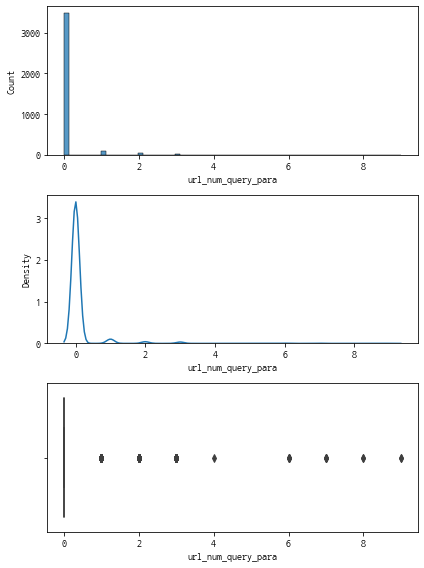

In [108]:
plt.figure(figsize = (6,8))
plt.subplot(3,1,1)
sns.histplot(data[feature], bins = 64)

plt.subplot(3,1,2)
sns.kdeplot(data[feature])

plt.subplot(3,1,3)
sns.boxplot(data[feature])

plt.tight_layout()
plt.show()

##### 6. 위 정보로부터 파악한 내용 정리

In [ ]:
대대분 URL쿼리의 파라미터 개수가 0임

##### 7. 추가 분석사항 도출

### 10. url_ip_present : URL내 IP표시 여부

In [95]:
feature = 'url_ip_present'

##### 1. 변수가 내포하고 있는 의미

In [ ]:
P표시 여부

##### 2. 변수가 수치형인지, 범주형인지

In [ ]:
수치형

##### 3. 결측치 존재 여부 및 조치 방안

In [96]:
data[feature].isnull().sum()

0

##### 4. 기초 통계량 확인

In [97]:
data[feature].describe()

count    3664.000000
mean        0.060862
std         0.239110
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: url_ip_present, dtype: float64

In [99]:
temp = data[feature].value_counts()
temp

0.0    3441
1.0     223
Name: url_ip_present, dtype: int64

##### 5. 데이터 분포 확인

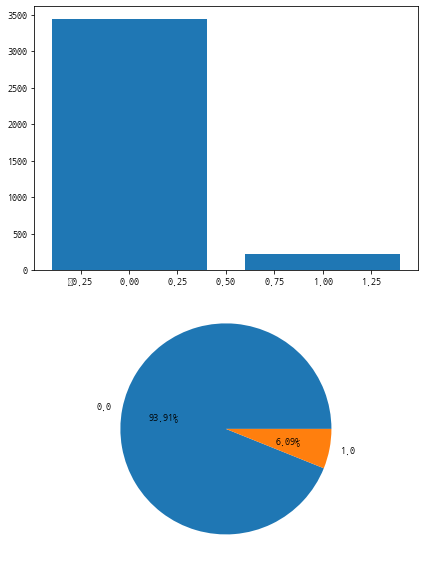

In [100]:
plt.figure(figsize = (6, 8))
plt.subplot(2,1,1)
plt.bar(temp.index, temp.values)

plt.subplot(2,1,2)
plt.pie(temp.values, labels = temp.index, autopct = '%.2f%%')

plt.tight_layout()
plt.show()

##### 6. 위 정보로부터 파악한 내용 정리

In [ ]:
93프로가 ip 포함 x
6프로 포함하므로 악성사이트 검사 필요

##### 7. 추가 분석사항 도출

### 11. url_entropy : URL 복잡도

In [119]:
feature = 'url_entropy'

##### 1. 변수가 내포하고 있는 의미

In [ ]:
악성코드는 분석가가 탐지 및 분석을 어렵게 하기 위하여 실행 압축 기술을 이용하고 있다. 
최근에는 실행 압축 기술이 적용된 코드에 대응하기 위하여 실행 압축 기술에 대한 연구가 진행되고 있다. 
실행 압축 기술은 압축된 실행코드를 해제해야 동작이 가능하여 실행 코드를 압축하는 과정에서 반복되는 코드를 이용한다. 
따라서 일반 코드와 비교하여 반복되는 코드가 많아서 동일한 코드가 유사한 주소 값을 가지고 수행되는 특성이 있다.
코드영역을 일정한 영역으로 구분하면 실행 압축이 해제되는 코드는 원래의 코드와 비교하여 낮은 엔트로피값을 갖는다.

In [ ]:
악성코드는 분석으로 어렵게 하기 위해 압축기술 활용
압축을하면 반복되는 코드가 많아진다.
압축을하면 원래 코드와 비교하여 낮은 엔트로피 값을 갖는다.

##### 2. 변수가 수치형인지, 범주형인지

In [ ]:
수치형

##### 3. 결측치 존재 여부 및 조치 방안

In [120]:
data[feature].isnull().sum()

0

##### 4. 기초 통계량 확인

In [121]:
data[feature].describe()

count    3664.000000
mean        4.228568
std         0.393055
min         2.737839
25%         3.983196
50%         4.189561
75%         4.458940
max         5.821782
Name: url_entropy, dtype: float64

##### 5. 데이터 분포 확인

C:\Users\Wslee\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


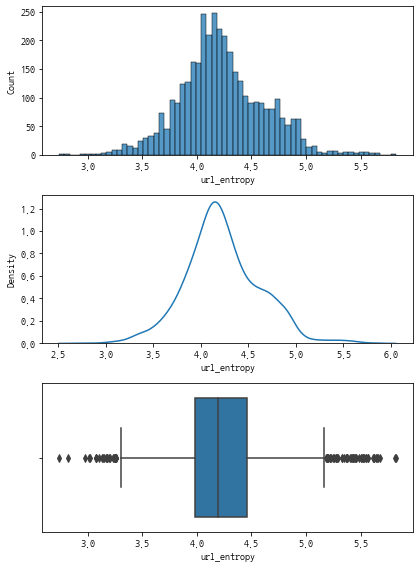

In [124]:
plt.figure(figsize = (6,8))
plt.subplot(3,1,1)
sns.histplot(data[feature], bins = 64)

plt.subplot(3,1,2)
sns.kdeplot(data[feature])

plt.subplot(3,1,3)
sns.boxplot(data[feature])

plt.tight_layout()
plt.show()

In [125]:
data[feature]

0       4.260333
1       4.636107
2       3.708966
3       4.025592
4       4.631833
          ...   
3659    4.135356
3660    4.362331
3661    4.693343
3662    4.604166
3663    3.619471
Name: url_entropy, Length: 3664, dtype: float64

##### 6. 위 정보로부터 파악한 내용 정리

In [ ]:
평균 4.2
악성사이트도 낮은 엔트로피 값을 같는지 확인해보자.

##### 7. 추가 분석사항 도출

### 12. url_chinese_present : URL내 중국어 표기 여부

In [126]:
feature = 'url_chinese_present'

##### 1. 변수가 내포하고 있는 의미

In [ ]:
URL내 중국어 표기 여부

##### 2. 변수가 수치형인지, 범주형인지

In [ ]:
범주형

##### 3. 결측치 존재 여부 및 조치 방안

In [127]:
data[feature].isnull().sum()

0

##### 4. 기초 통계량 확인

In [128]:
data[feature].describe()

count    3664.0
mean        0.0
std         0.0
min         0.0
25%         0.0
50%         0.0
75%         0.0
max         0.0
Name: url_chinese_present, dtype: float64

In [131]:
temp = data[feature].value_counts()
temp

0.0    3664
Name: url_chinese_present, dtype: int64

plt.figure(figsize = (6, 8))
plt.subplot(2,1,1)
plt.bar(temp.index, temp.values)

plt.subplot(2,1,2)
plt.pie(temp.values, labels = temp.index, autopct = '%.2f%%')

plt.tight_layout()
plt.show()##### 5. 데이터 분포 확인

C:\Users\Wslee\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Wslee\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


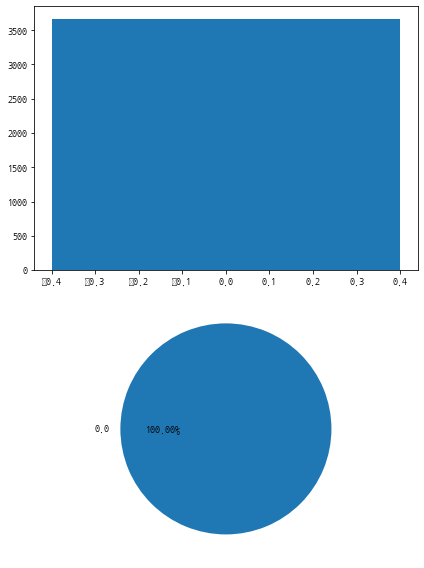

In [132]:
plt.figure(figsize = (6, 8))
plt.subplot(2,1,1)
plt.bar(temp.index, temp.values)

plt.subplot(2,1,2)
plt.pie(temp.values, labels = temp.index, autopct = '%.2f%%')

plt.tight_layout()
plt.show()

##### 6. 위 정보로부터 파악한 내용 정리

In [ ]:
다 똑같은 값 삭제 필요

##### 7. 추가 분석사항 도출

### 13. url_port : URL내 포트 표기 여부

In [133]:
feature = 'url_port'

##### 1. 변수가 내포하고 있는 의미

In [ ]:
URL내 포트 표기 여부

##### 2. 변수가 수치형인지, 범주형인지

In [ ]:
범주형

##### 3. 결측치 존재 여부 및 조치 방안

In [134]:
data[feature].isnull().sum()

0

##### 4. 기초 통계량 확인

In [135]:
data[feature].describe()

count    3664.000000
mean        0.002183
std         0.046682
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: url_port, dtype: float64

In [136]:
temp = data[feature].value_counts()
temp

0.0    3656
1.0       8
Name: url_port, dtype: int64

##### 5. 데이터 분포 확인

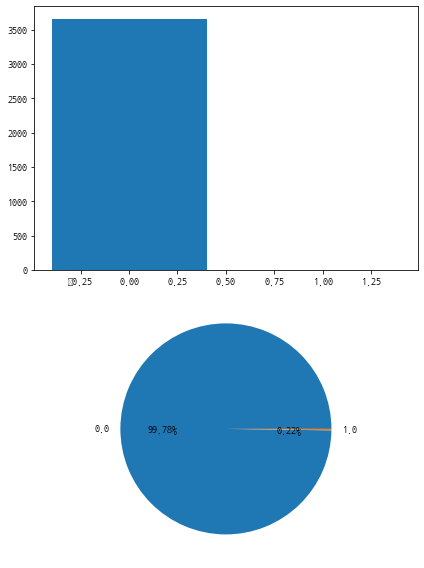

In [137]:
plt.figure(figsize = (6, 8))
plt.subplot(2,1,1)
plt.bar(temp.index, temp.values)

plt.subplot(2,1,2)
plt.pie(temp.values, labels = temp.index, autopct = '%.2f%%')

plt.tight_layout()
plt.show()

##### 6. 위 정보로부터 파악한 내용 정리

In [ ]:
포트번호 있는 데이터 8개
포트 번호가 있으면 악성사이트 인가?

##### 7. 추가 분석사항 도출

### 14. html_num_tags('iframe') : HTML내 'iframe' 태그 개수

In [139]:
data.head()

,Unnamed: 0,url_len,url_num_hyphens_dom,url_path_len,url_domain_len,url_hostname_len,url_num_dots,url_num_underscores,url_query_len,url_num_query_para,...,html_num_tags('script'),html_num_tags('embed'),html_num_tags('object'),html_num_tags('div'),html_num_tags('head'),html_num_tags('body'),html_num_tags('form'),html_num_tags('a'),html_num_tags('applet'),Result_v1
0,0,23.0,0.0,8.0,15.0,15.0,2.0,0.0,0.0,0.0,...,7.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,malicious
1,1,75.0,0.0,58.0,17.0,17.0,6.0,0.0,0.0,0.0,...,18.0,0.0,0.0,20.0,1.0,1.0,0.0,21.0,0.0,benign
2,2,20.0,0.0,4.0,16.0,16.0,2.0,0.0,0.0,0.0,...,33.0,0.0,0.0,101.0,1.0,1.0,3.0,70.0,0.0,benign
3,3,27.0,0.0,13.0,14.0,14.0,3.0,0.0,0.0,0.0,...,15.0,0.0,0.0,151.0,1.0,1.0,1.0,55.0,0.0,benign
4,4,39.0,2.0,12.0,27.0,27.0,2.0,0.0,0.0,0.0,...,10.0,0.0,0.0,332.0,1.0,1.0,0.0,321.0,0.0,benign


In [140]:
feature = 'html_num_tags(\'iframe\')'

##### 1. 변수가 내포하고 있는 의미

In [ ]:
HTML내 'iframe' 태그 개수

##### 2. 변수가 수치형인지, 범주형인지

In [ ]:
수치형

##### 3. 결측치 존재 여부 및 조치 방안

In [141]:
data[feature].isnull().sum()

0

##### 4. 기초 통계량 확인

In [142]:
data[feature].describe()

count    3664.000000
mean        0.220797
std         0.898383
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max        26.000000
Name: html_num_tags('iframe'), dtype: float64

##### 5. 데이터 분포 확인

C:\Users\Wslee\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


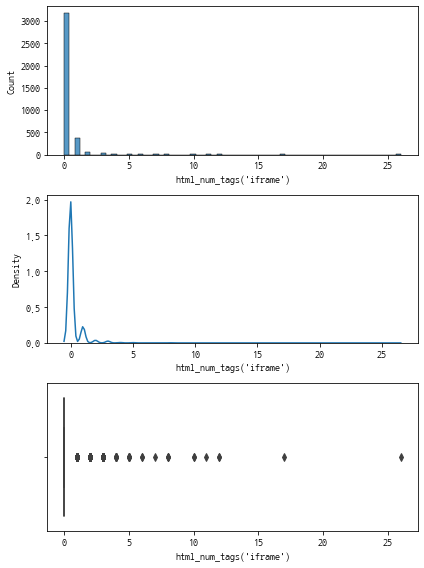

In [143]:
plt.figure(figsize = (6,8))
plt.subplot(3,1,1)
sns.histplot(data[feature], bins = 64)

plt.subplot(3,1,2)
sns.kdeplot(data[feature])

plt.subplot(3,1,3)
sns.boxplot(data[feature])

plt.tight_layout()
plt.show()

##### 6. 위 정보로부터 파악한 내용 정리

In [ ]:
대부분 iframe이 없음 iframe 있는 데이터 확인 필요
다른 웹페이지를 삽입할수 있기때문에 악성사이트일수 있지 않을까?

##### 7. 추가 분석사항 도출

### 15. html_num_tags('script') : HTML내 'script' 태그 개수

In [145]:
feature = 'html_num_tags(\'script\')'

##### 1. 변수가 내포하고 있는 의미

In [ ]:
HTML내 'script' 태그 개수

##### 2. 변수가 수치형인지, 범주형인지

In [ ]:
수치형

##### 3. 결측치 존재 여부 및 조치 방안

In [146]:
data[feature].isnull().sum()

0

##### 4. 기초 통계량 확인

In [147]:
data[feature].describe()

count    3664.000000
mean        8.785480
std        12.647356
min         0.000000
25%         2.000000
50%         4.000000
75%        12.000000
max       267.000000
Name: html_num_tags('script'), dtype: float64

##### 5. 데이터 분포 확인

C:\Users\Wslee\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


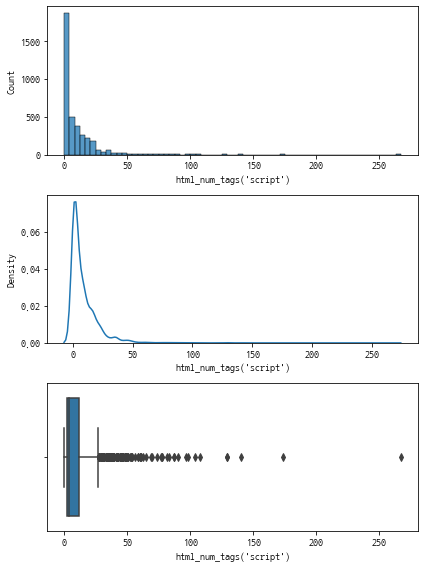

In [149]:
plt.figure(figsize = (6,8))
plt.subplot(3,1,1)
sns.histplot(data[feature], bins = 64)

plt.subplot(3,1,2)
sns.kdeplot(data[feature])

plt.subplot(3,1,3)
sns.boxplot(data[feature])

plt.tight_layout()
plt.show()

##### 6. 위 정보로부터 파악한 내용 정리

In [ ]:
평균 8, 10밑에 가까움

##### 7. 추가 분석사항 도출

### 16. html_num_tags('embed') : HTML내 'embed' 태그 개수

In [150]:
feature = 'html_num_tags(\'embed\')'

##### 1. 변수가 내포하고 있는 의미

In [ ]:
HTML내 'embed' 태그 개수
음악파일이나 동영상파일을 재생시키는 태그

##### 2. 변수가 수치형인지, 범주형인지

In [ ]:
수치형

##### 3. 결측치 존재 여부 및 조치 방안

In [151]:
data[feature].isnull().sum()

0

##### 4. 기초 통계량 확인

In [152]:
data[feature].describe()

count    3664.000000
mean        0.018013
std         0.144808
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         3.000000
Name: html_num_tags('embed'), dtype: float64

##### 5. 데이터 분describe인

C:\Users\Wslee\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


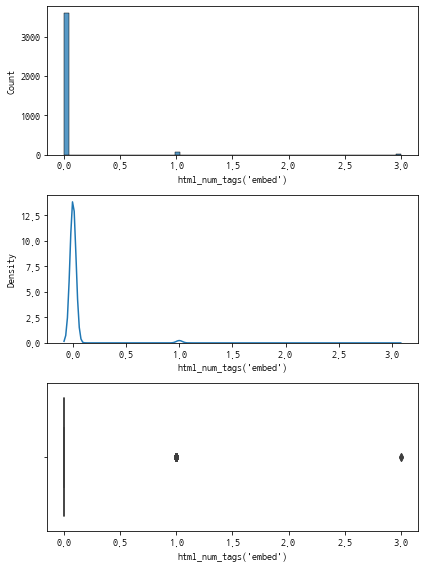

In [153]:
plt.figure(figsize = (6,8))
plt.subplot(3,1,1)
sns.histplot(data[feature], bins = 64)

plt.subplot(3,1,2)
sns.kdeplot(data[feature])

plt.subplot(3,1,3)
sns.boxplot(data[feature])

plt.tight_layout()
plt.show()

##### 6. 위 정보로부터 파악한 내용 정리

In [ ]:
대부분 0 최대값 3 있는 값 확인 필요

##### 7. 추가 분석사항 도출

### 17. html_num_tags('object') : HTML내 'object' 태그 개수

In [154]:
feature = 'html_num_tags(\'object\')'

##### 1. 변수가 내포하고 있는 의미

In [ ]:
HTML내 'object' 태그 개수
멀티미디어를 사용하는 태그

##### 2. 변수가 수치형인지, 범주형인지

In [ ]:
수치형

##### 3. 결측치 존재 여부 및 조치 방안

In [156]:
data[feature].isnull().sum()

0

##### 4. 기초 통계량 확인

In [157]:
data[feature].describe()

count    3664.000000
mean        0.028930
std         0.237682
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         8.000000
Name: html_num_tags('object'), dtype: float64

##### 5. 데이터 분포 확인

C:\Users\Wslee\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


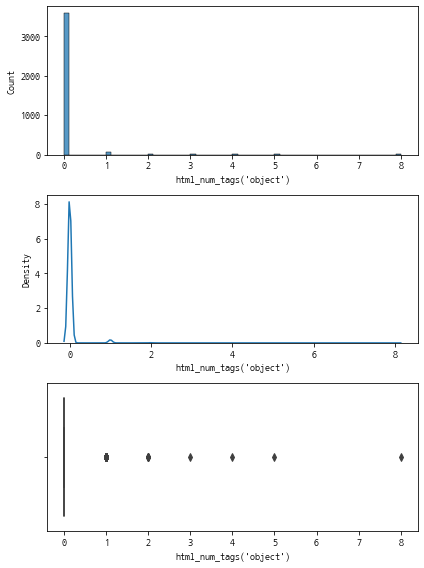

In [158]:
plt.figure(figsize = (6,8))
plt.subplot(3,1,1)
sns.histplot(data[feature], bins = 64)

plt.subplot(3,1,2)
sns.kdeplot(data[feature])

plt.subplot(3,1,3)
sns.boxplot(data[feature])

plt.tight_layout()
plt.show()

##### 6. 위 정보로부터 파악한 내용 정리

In [ ]:
대부분의 값이 0 이다

##### 7. 추가 분석사항 도출

### 18. html_num_tags('div') : HTML내 'div' 태그 개수

In [160]:
feature = 'html_num_tags(\'div\')'

##### 1. 변수가 내포하고 있는 의미

In [ ]:
HTML내 'div' 태그 개수

##### 2. 변수가 수치형인지, 범주형인지

In [ ]:
수치형

##### 3. 결측치 존재 여부 및 조치 방안

In [161]:
data[feature].isnull().sum()

0

##### 4. 기초 통계량 확인

In [162]:
data[feature].describe()

count     3664.000000
mean        70.843886
std        365.593304
min          0.000000
25%          6.000000
50%         33.000000
75%         62.000000
max      19941.000000
Name: html_num_tags('div'), dtype: float64

##### 5. 데이터 분포 확인

C:\Users\Wslee\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


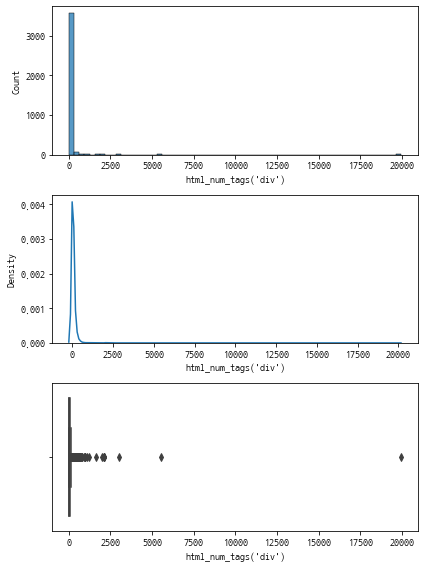

In [163]:
plt.figure(figsize = (6,8))
plt.subplot(3,1,1)
sns.histplot(data[feature], bins = 64)

plt.subplot(3,1,2)
sns.kdeplot(data[feature])

plt.subplot(3,1,3)
sns.boxplot(data[feature])

plt.tight_layout()
plt.show()

##### 6. 위 정보로부터 파악한 내용 정리

In [ ]:
평균 70, 많이 사용하는 태그인데 구별가능할까?

##### 7. 추가 분석사항 도출

### 19. html_num_tags('head') : HTML내 'head' 태그 개수

In [164]:
feature = 'html_num_tags(\'head\')'

##### 1. 변수가 내포하고 있는 의미

In [ ]:
HTML내 'head' 

##### 2. 변수가 수치형인지, 범주형인지

In [ ]:
수치형

##### 3. 결측치 존재 여부 및 조치 방안

In [165]:
data[feature].isnull().sum()

0

##### 4. 기초 통계량 확인

In [166]:
data[feature].describe()

count    3664.000000
mean        0.998090
std         0.144974
min         0.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         3.000000
Name: html_num_tags('head'), dtype: float64

##### 5. 데이터 분포 확인

C:\Users\Wslee\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


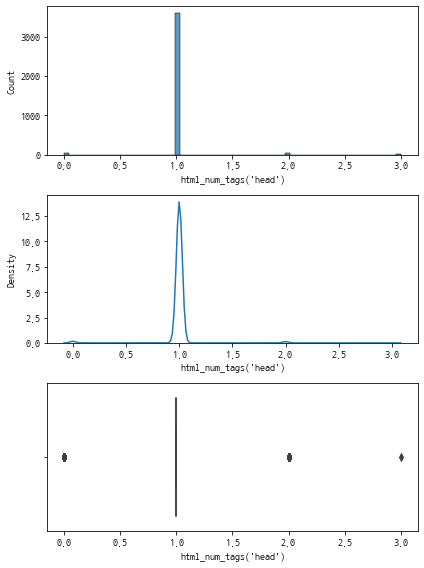

In [167]:
plt.figure(figsize = (6,8))
plt.subplot(3,1,1)
sns.histplot(data[feature], bins = 64)

plt.subplot(3,1,2)
sns.kdeplot(data[feature])

plt.subplot(3,1,3)
sns.boxplot(data[feature])

plt.tight_layout()
plt.show()

##### 6. 위 정보로부터 파악한 내용 정리

In [ ]:
대두분 head는 1개 있음 이걸로 구별 가능한가? 없는 사이트랑 여러개인 사이트 확인 필요

##### 7. 추가 분석사항 도출

### 20. html_num_tags('body') : HTML내 'body' 태그 개수

In [168]:
feature = 'html_num_tags(\'body\')'

##### 1. 변수가 내포하고 있는 의미

In [ ]:
HTML내 'body' 태그 개수

##### 2. 변수가 수치형인지, 범주형인지

In [ ]:
수치형

##### 3. 결측치 존재 여부 및 조치 방안

In [170]:
data[feature].isnull().sum()

0

##### 4. 기초 통계량 확인

In [171]:
data[feature].describe()

count    3664.000000
mean        1.016648
std         0.225330
min         0.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         3.000000
Name: html_num_tags('body'), dtype: float64

##### 5. 데이터 분포 확인

C:\Users\Wslee\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


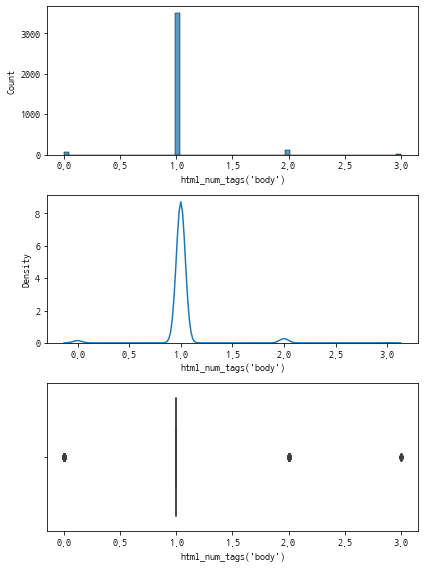

In [172]:
plt.figure(figsize = (6,8))
plt.subplot(3,1,1)
sns.histplot(data[feature], bins = 64)

plt.subplot(3,1,2)
sns.kdeplot(data[feature])

plt.subplot(3,1,3)
sns.boxplot(data[feature])

plt.tight_layout()
plt.show()

##### 6. 위 정보로부터 파악한 내용 정리

In [ ]:
대부분 1개를 가짐, 0개 또는 여러개 확인 필요

##### 7. 추가 분석사항 도출

### 21. html_num_tags('form') : HTML내 'form' 태그 개수

In [173]:
feature = 'html_num_tags(\'form\')'

##### 1. 변수가 내포하고 있는 의미

In [ ]:
HTML내 'form' 태그 개수

##### 2. 변수가 수치형인지, 범주형인지

In [ ]:
수치형

##### 3. 결측치 존재 여부 및 조치 방안

In [174]:
data[feature].isnull().sum()

0

##### 4. 기초 통계량 확인

In [175]:
data[feature].describe()

count    3664.000000
mean        1.028930
std         1.563903
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max        57.000000
Name: html_num_tags('form'), dtype: float64

##### 5. 데이터 분포 확인

C:\Users\Wslee\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


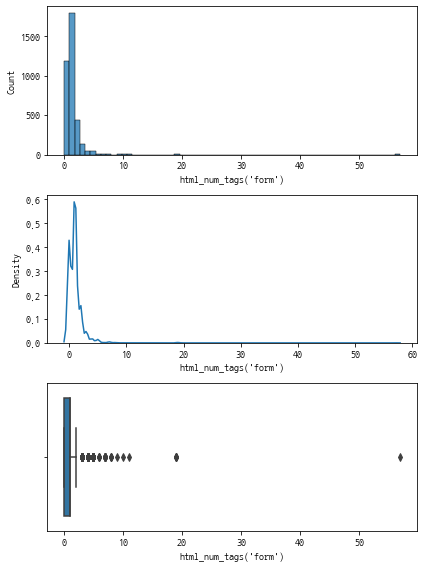

In [176]:
plt.figure(figsize = (6,8))
plt.subplot(3,1,1)
sns.histplot(data[feature], bins = 64)

plt.subplot(3,1,2)
sns.kdeplot(data[feature])

plt.subplot(3,1,3)
sns.boxplot(data[feature])

plt.tight_layout()
plt.show()

##### 6. 위 정보로부터 파악한 내용 정리

In [ ]:
대부분 1개의 값을 갖는다.
form 태그가 그런가?

##### 7. 추가 분석사항 도출

### 22. html_num_tags('a') : HTML내 'a' 태그 개수

In [177]:
feature = 'html_num_tags(\'a\')'

##### 1. 변수가 내포하고 있는 의미

In [ ]:
HTML내 'a' 태그 개수

##### 2. 변수가 수치형인지, 범주형인지

##### 3. 결측치 존재 여부 및 조치 방안

In [178]:
data[feature].isnull().sum()

0

##### 4. 기초 통계량 확인

In [179]:
data[feature].describe()

count     3664.000000
mean        66.182860
std        342.651459
min          0.000000
25%          2.000000
50%         16.000000
75%         52.000000
max      13451.000000
Name: html_num_tags('a'), dtype: float64

##### 5. 데이터 분포 확인

C:\Users\Wslee\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


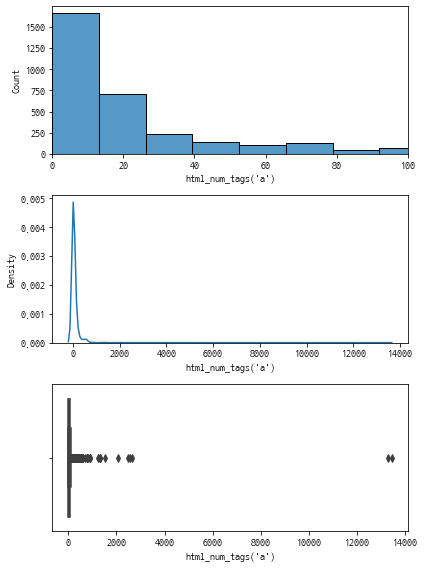

In [182]:
plt.figure(figsize = (6,8))
plt.subplot(3,1,1)
plt.xlim(0, 100)
sns.histplot(data[feature], bins = 1024)

plt.subplot(3,1,2)
sns.kdeplot(data[feature])

plt.subplot(3,1,3)
sns.boxplot(data[feature])

plt.tight_layout()
plt.show()

##### 6. 위 정보로부터 파악한 내용 정리

In [ ]:
평균은 66이나 대부분 50 미만의 값을 가짐

##### 7. 추가 분석사항 도출

### 23. html_num_tags('applet') : HTML내 'applet' 태그 개수

In [183]:
feature = 'html_num_tags(\'applet\')'

##### 1. 변수가 내포하고 있는 의미

In [ ]:
HTML내 'applet' 태그 개수

##### 2. 변수가 수치형인지, 범주형인지

In [ ]:
수치형

##### 3. 결측치 존재 여부 및 조치 방안

In [184]:
data[feature].isnull().sum()

0

##### 4. 기초 통계량 확인

In [185]:
data[feature].describe()

count    3664.0
mean        0.0
std         0.0
min         0.0
25%         0.0
50%         0.0
75%         0.0
max         0.0
Name: html_num_tags('applet'), dtype: float64

##### 5. 데이터 분포 확인

C:\Users\Wslee\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
C:\Users\Wslee\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Wslee\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Wslee\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


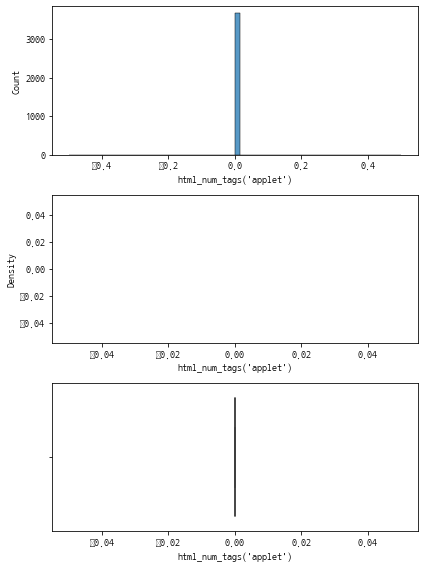

In [186]:
plt.figure(figsize = (6,8))
plt.subplot(3,1,1)
sns.histplot(data[feature], bins = 64)

plt.subplot(3,1,2)
sns.kdeplot(data[feature])

plt.subplot(3,1,3)
sns.boxplot(data[feature])

plt.tight_layout()
plt.show()

##### 6. 위 정보로부터 파악한 내용 정리

In [ ]:
값이 하나로 똑같음 삭제 필요

##### 7. 추가 분석사항 도출

url_len : URL 길이
url_num_hypens_dom : URL내 '-'(하이픈) 개수
url_path_len : URL의 경로 길이
url_domain_len : URL의 도메인 길이
url_host_name : URL의 hostname 길이
url_num_dots : URL내 '.'(닷) 개수
url_num_underscores : URL내 '_'(언더바) 개수
url_query_len : URL쿼리 길이
url_num_query_para : URL쿼리의 파라미터 개수
url_ip_present : URL내 IP표시 여부
url_entropy : URL 복잡도
url_chinese_present : URL내 중국어 표기 여부
url_port : URL내 포트 표기 여부
html_num_tags('iframe') : HTML내 'iframe' 태그 개수
html_num_tags('script') : HTML내 'script' 태그 개수
html_num_tags('embed') : HTML내 'embed' 태그 개수
html_num_tags('object') : HTML내 'object' 태그 개수
html_num_tags('div') : HTML내 'div' 태그 개수
html_num_tags('head') : HTML내 'head' 태그 개수
html_num_tags('body') : HTML내 'body' 태그 개수
html_num_tags('form') : HTML내 'form' 태그 개수
html_num_tags('a') : HTML내 'a' 태그 개수
html_num_tags('applet') : HTML내 'applet' 태그 개수
Result_v1 : 악성사이트 여부 컬럼 ( 'malicious'는 악성사이트, 'benign'은 정상사이트 )

## <b>Q2. 데이터 이변량 분석하기

* 자료의 종류에 맞게 X --> Y 에 대해서 그래프(시각화)와 가설검정(수치화)를 수행하고 결과를 평가합니다.
* 가설검정시 다음의 항목을 참조하여 수행합니다.
    * 적절한 유의수준
    * 숫자 --> 숫자 : 상관분석
    * 범주 --> 범주 : 카이제곱검정
    * 범주 --> 숫자 : t검정, 분산분석
    * 숫자 --> 범주 : 로지스틱 회귀모형을 통해, 회귀계수의 P.value로 검정을 수행합니다.

### 1. url_len

In [209]:
feature = "url_len"

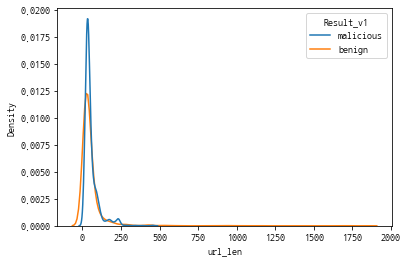

In [188]:
sns.kdeplot(x=feature, data = data, hue = target, common_norm = False) #nomalize
plt.show() 

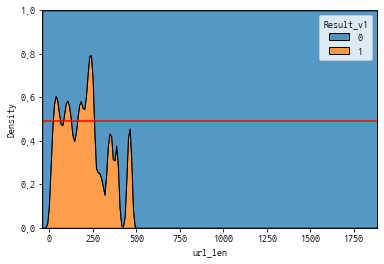

In [197]:
sns.kdeplot(x=feature, data = data, hue =target
            , multiple = 'fill')
plt.axhline(data[target].mean(), color = 'r')
plt.show()

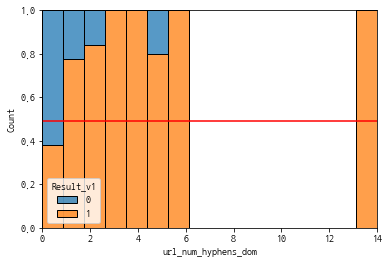

In [207]:
sns.histplot(x=feature, data = data, bins = 16
             , hue =target, multiple = 'fill')
plt.axhline(data[target].mean(), color = 'r')
plt.show()

In [210]:
temp = data.loc[data[feature].notnull(), ]
model = sm.Logit(temp[target], temp[feature])
result = model.fit()
print(result.pvalues)

Optimization terminated successfully.
         Current function value: 0.693146
         Iterations 2
url_len    0.924541
dtype: float64


### 2. url_num_hyphens_dom

In [212]:
feature = "url_num_hyphens_dom"

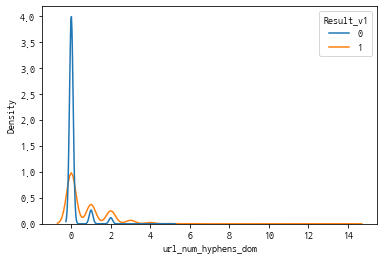

In [200]:
sns.kdeplot(x=feature, data = data, hue = target, common_norm = False) #nomalize
plt.show() 

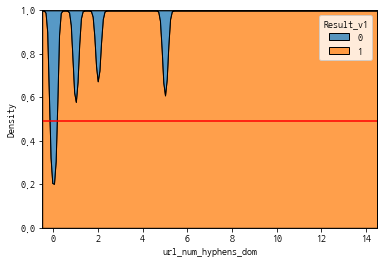

In [202]:
sns.kdeplot(x=feature, data = data, hue =target
            , multiple = 'fill')
plt.axhline(data[target].mean(), color = 'r')
plt.show()

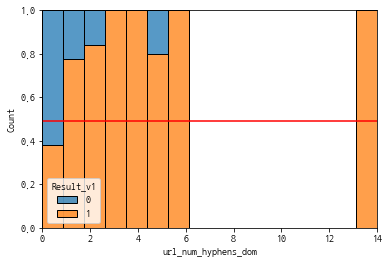

In [206]:
sns.histplot(x=feature, data = data, bins = 16
             , hue =target, multiple = 'fill')
plt.axhline(data[target].mean(), color = 'r')
plt.show()

In [213]:
temp = data.loc[data[feature].notnull(), ]
model = sm.Logit(temp[target], temp[feature])
result = model.fit()
print(result.pvalues)

Optimization terminated successfully.
         Current function value: 0.632202
         Iterations 6
url_num_hyphens_dom    1.737921e-61
dtype: float64


### 3. url_path_len

In [214]:
feature = "url_path_len"

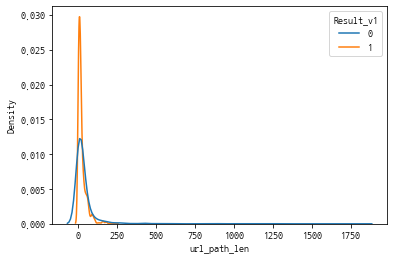

In [215]:
sns.kdeplot(x=feature, data = data, hue = target, common_norm = False) #nomalize
plt.show() 

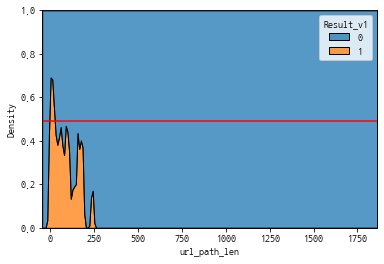

In [217]:
sns.kdeplot(x=feature, data = data, hue =target
            , multiple = 'fill')
plt.axhline(data[target].mean(), color = 'r')
plt.show()

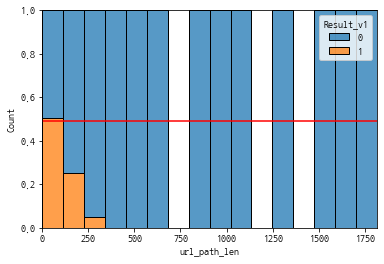

In [218]:
sns.histplot(x=feature, data = data, bins = 16
             , hue =target, multiple = 'fill')
plt.axhline(data[target].mean(), color = 'r')
plt.show()

In [219]:
temp = data.loc[data[feature].notnull(), ]
model = sm.Logit(temp[target], temp[feature])
result = model.fit()
print(result.pvalues)

Optimization terminated successfully.
         Current function value: 0.686527
         Iterations 5
url_path_len    4.838732e-09
dtype: float64


### 4. url_domain_len

In [220]:
feature = "url_domain_len"

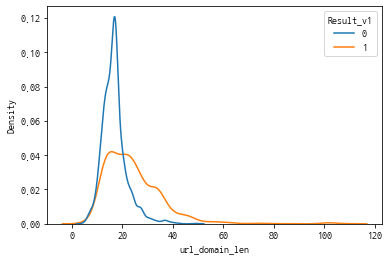

In [221]:
sns.kdeplot(x=feature, data = data, hue = target, common_norm = False) #nomalize
plt.show() 

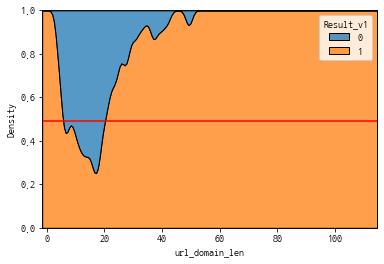

In [223]:
sns.kdeplot(x=feature, data = data, hue =target
            , multiple = 'fill')
plt.axhline(data[target].mean(), color = 'r')
plt.show()

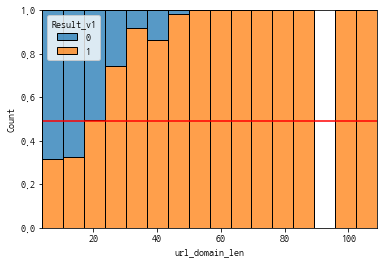

In [224]:
sns.histplot(x=feature, data = data, bins = 16
             , hue =target, multiple = 'fill')
plt.axhline(data[target].mean(), color = 'r')
plt.show()

In [225]:
temp = data.loc[data[feature].notnull(), ]
model = sm.Logit(temp[target], temp[feature])
result = model.fit()
print(result.pvalues)

Optimization terminated successfully.
         Current function value: 0.682007
         Iterations 4
url_domain_len    5.477126e-19
dtype: float64


### 5. url_num_dots

In [226]:
feature = "url_len"

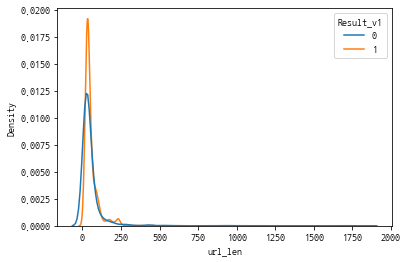

In [227]:
sns.kdeplot(x=feature, data = data, hue = target, common_norm = False) #nomalize
plt.show() 

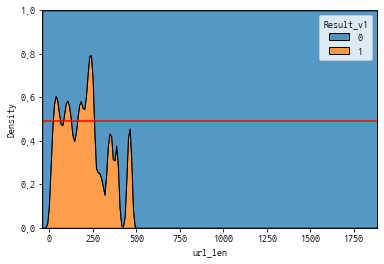

In [228]:
sns.kdeplot(x=feature, data = data, hue =target
            , multiple = 'fill')
plt.axhline(data[target].mean(), color = 'r')
plt.show()

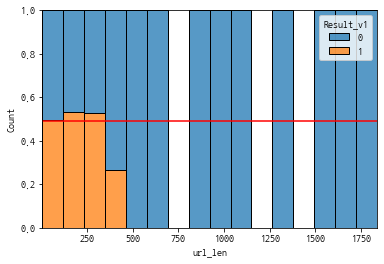

In [230]:
sns.histplot(x=feature, data = data, bins = 16
             , hue =target, multiple = 'fill')
plt.axhline(data[target].mean(), color = 'r')
plt.show()

In [231]:
temp = data.loc[data[feature].notnull(), ]
model = sm.Logit(temp[target], temp[feature])
result = model.fit()
print(result.pvalues)

Optimization terminated successfully.
         Current function value: 0.693146
         Iterations 2
url_len    0.924541
dtype: float64


### 6. url_num_underscores

In [232]:
feature = "url_num_underscores"

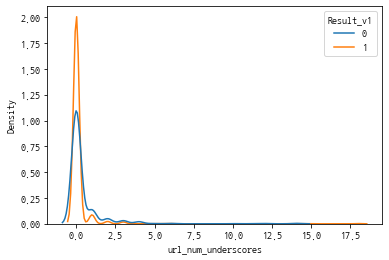

In [233]:
sns.kdeplot(x=feature, data = data, hue = target, common_norm = False) #nomalize
plt.show() 

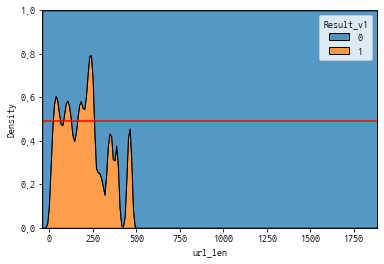

In [197]:
sns.kdeplot(x=feature, data = data, hue =target
            , multiple = 'fill')
plt.axhline(data[target].mean(), color = 'r')
plt.show()

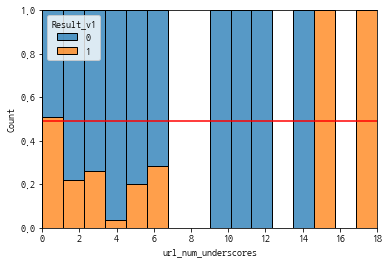

In [235]:
sns.histplot(x=feature, data = data, bins = 16
             , hue =target, multiple = 'fill')
plt.axhline(data[target].mean(), color = 'r')
plt.show()

In [236]:
temp = data.loc[data[feature].notnull(), ]
model = sm.Logit(temp[target], temp[feature])
result = model.fit()
print(result.pvalues)

Optimization terminated successfully.
         Current function value: 0.682103
         Iterations 6
url_num_underscores    4.394527e-13
dtype: float64


### 7. url_query_len

In [237]:
feature = "url_query_len"

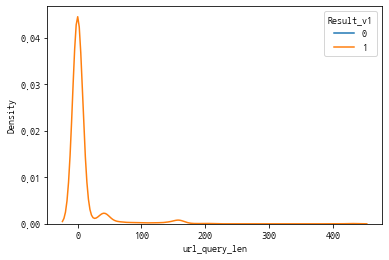

In [246]:
sns.kdeplot(x=feature, data = data, hue = target, common_norm = False, warn_singular=False) #nomalize
plt.show() 

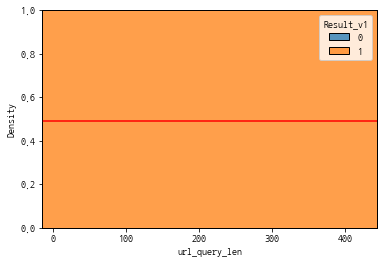

In [247]:
sns.kdeplot(x=feature, data = data, hue =target
            , multiple = 'fill', warn_singular=False)
plt.axhline(data[target].mean(), color = 'r')
plt.show()

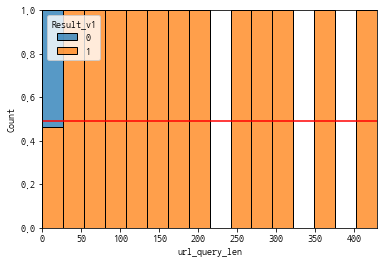

In [249]:
sns.histplot(x=feature, data = data, bins = 16
             , hue =target, multiple = 'fill')
plt.axhline(data[target].mean(), color = 'r')
plt.show()

In [245]:
temp = data.loc[data[feature].notnull(), ]
model = sm.Logit(temp[target], temp[feature])
result = model.fit()
print(result.pvalues)

         Current function value: 0.650015
         Iterations: 35
url_query_len    0.99958
dtype: float64


C:\Users\Wslee\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


### 8. url_num_query_para

In [250]:
feature = "url_num_query_para"

C:\Users\Wslee\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


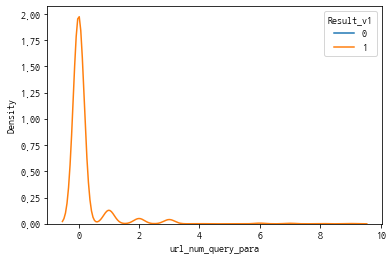

In [251]:
sns.kdeplot(x=feature, data = data, hue = target, common_norm = False) #nomalize
plt.show() 

C:\Users\Wslee\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


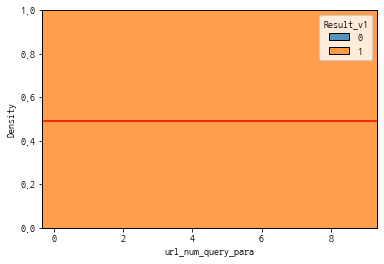

In [252]:
sns.kdeplot(x=feature, data = data, hue =target
            , multiple = 'fill')
plt.axhline(data[target].mean(), color = 'r')
plt.show()

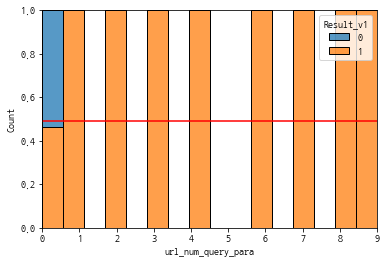

In [254]:
sns.histplot(x=feature, data = data, bins = 16
             , hue =target, multiple = 'fill')
plt.axhline(data[target].mean(), color = 'r')
plt.show()

In [255]:
temp = data.loc[data[feature].notnull(), ]
model = sm.Logit(temp[target], temp[feature])
result = model.fit()
print(result.pvalues)

         Current function value: 0.656636
         Iterations: 35
url_num_query_para    0.994058
dtype: float64


C:\Users\Wslee\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


### 9. url_ip_present

In [256]:
feature = "url_ip_present"

In [257]:
pd.crosstab(data[target], data[feature], normalize = 'all')

url_ip_present,0.0,1.0
Result_v1,,
0,0.466703,0.040393
1,0.472434,0.020469


Result_v1              0         1
url_ip_present                    
0.0             0.496949  0.503051
1.0             0.663677  0.336323


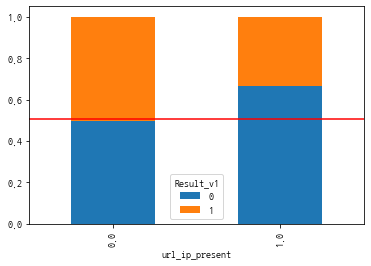

In [260]:
temp = pd.crosstab(data[feature], data[target], normalize = 'index')
print(temp)
temp.plot.bar(stacked=True)

# 전체 평균
plt.axhline(1-data[target].mean(), color = 'r')
plt.show()

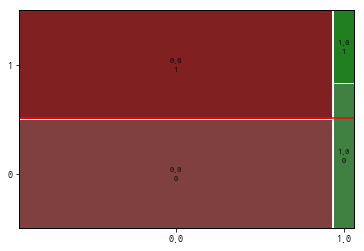

In [266]:
mosaic(data.sort_values([feature ,target]), [ feature, target])
plt.axhline(1- data[target].mean(), color = 'r')
plt.show()

In [272]:
# 먼저 집계
table = pd.crosstab(data[target], data[feature])
print('교차표\n', table)
print('-' * 100)

# 카이제곱검정
result = spst.chi2_contingency(table)
print('카이제곱통계량', result[0])
print('p-value', result[1])
print('자유도', result[2])
print('기대빈도\n',result[3])

교차표
 url_entropy  2.737839  2.819808  2.971861  3.012016  3.019766  3.074516  \
Result_v1                                                                 
0                   1         1         0         0         0         0   
1                   0         0         1         1         1         2   

url_entropy  3.077324  3.103702  3.127987  3.137016  ...  5.566057  5.567501  \
Result_v1                                            ...                       
0                   1         1         1         0  ...         0         0   
1                   0         0         0         1  ...         1         1   

url_entropy  5.612820  5.624739  5.645038  5.647272  5.655639  5.676410  \
Result_v1                                                                 
0                   0         0         0         0         0         0   
1                   1         2         1         1         1         1   

url_entropy  5.815522  5.821782  
Result_v1                        
0   

### 10. url_entropy

In [267]:
feature = "url_entropy"

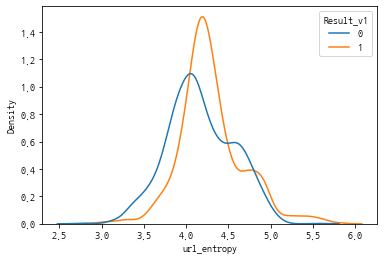

In [268]:
sns.kdeplot(x=feature, data = data, hue = target, common_norm = False) #nomalize
plt.show() 

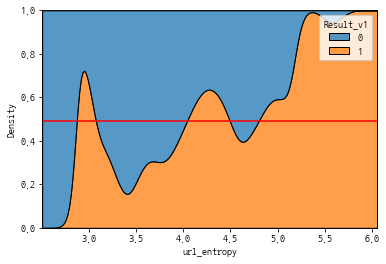

In [269]:
sns.kdeplot(x=feature, data = data, hue =target
            , multiple = 'fill')
plt.axhline(data[target].mean(), color = 'r')
plt.show()

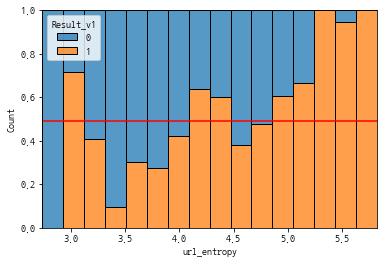

In [270]:
sns.histplot(x=feature, data = data, bins = 16
             , hue =target, multiple = 'fill')
plt.axhline(data[target].mean(), color = 'r')
plt.show()

In [271]:
temp = data.loc[data[feature].notnull(), ]
model = sm.Logit(temp[target], temp[feature])
result = model.fit()
print(result.pvalues)

Optimization terminated successfully.
         Current function value: 0.693146
         Iterations 2
url_entropy    0.941981
dtype: float64


### 11. url_num_underscores

In [273]:
feature = "url_port"

In [274]:
pd.crosstab(data[target], data[feature], normalize = 'all')

url_port,0.0,1.0
Result_v1,,
0,0.505731,0.001365
1,0.492085,0.000819


Result_v1         0         1
url_port                     
0.0        0.506838  0.493162
1.0        0.625000  0.375000


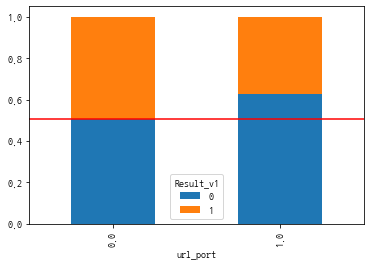

In [275]:
temp = pd.crosstab(data[feature], data[target], normalize = 'index')
print(temp)
temp.plot.bar(stacked=True)

# 전체 평균
plt.axhline(1-data[target].mean(), color = 'r')
plt.show()

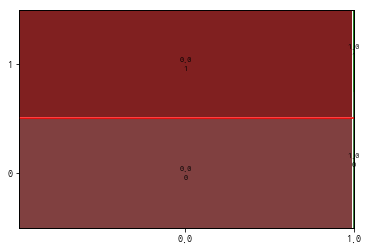

In [276]:
mosaic(data.sort_values([feature ,target]), [ feature, target])
plt.axhline(1- data[target].mean(), color = 'r')
plt.show()

In [277]:
# 먼저 집계
table = pd.crosstab(data[target], data[feature])
print('교차표\n', table)
print('-' * 100)

# 카이제곱검정
result = spst.chi2_contingency(table)
print('카이제곱통계량', result[0])
print('p-value', result[1])
print('자유도', result[2])
print('기대빈도\n',result[3])

교차표
 url_port    0.0  1.0
Result_v1           
0          1853    5
1          1803    3
----------------------------------------------------------------------------------------------------
카이제곱통계량 0.0984618258872073
p-value 0.7536833698526882
자유도 1
기대빈도
 [[1853.94323144    4.05676856]
 [1802.05676856    3.94323144]]


### 12. html_num_tags('iframe')

In [283]:
feature = "html_num_tags(\'iframe\')"

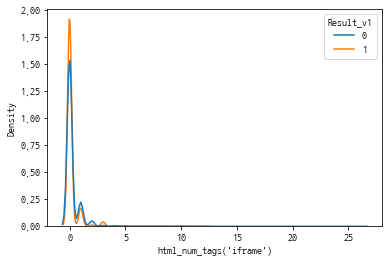

In [284]:
sns.kdeplot(x=feature, data = data, hue = target, common_norm = False) #nomalize
plt.show() 

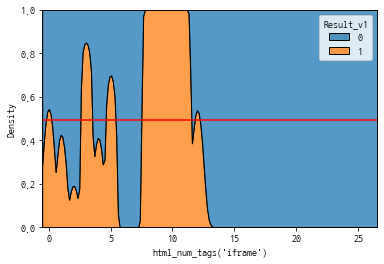

In [285]:
sns.kdeplot(x=feature, data = data, hue =target
            , multiple = 'fill')
plt.axhline(data[target].mean(), color = 'r')
plt.show()

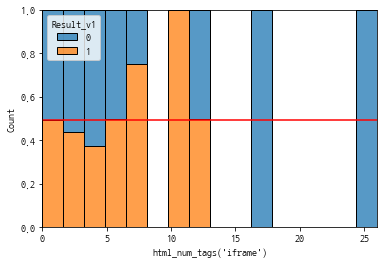

In [286]:
sns.histplot(x=feature, data = data, bins = 16
             , hue =target, multiple = 'fill')
plt.axhline(data[target].mean(), color = 'r')
plt.show()

In [287]:
temp = data.loc[data[feature].notnull(), ]
model = sm.Logit(temp[target], temp[feature])
result = model.fit()
print(result.pvalues)

Optimization terminated successfully.
         Current function value: 0.692840
         Iterations 4
html_num_tags('iframe')    0.146136
dtype: float64


### 13. html_num_tags('script')

In [288]:
feature = "html_num_tags('script')"

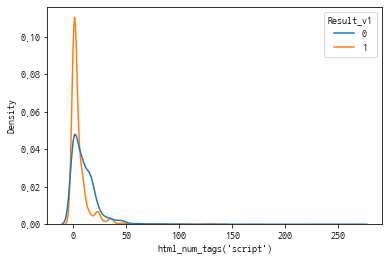

In [289]:
sns.kdeplot(x=feature, data = data, hue = target, common_norm = False) #nomalize
plt.show() 

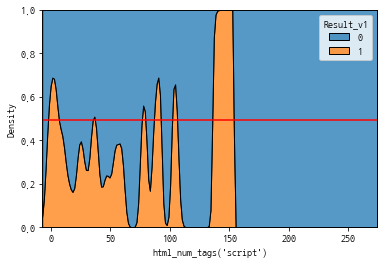

In [290]:
sns.kdeplot(x=feature, data = data, hue =target
            , multiple = 'fill')
plt.axhline(data[target].mean(), color = 'r')
plt.show()

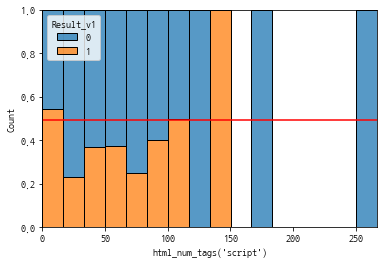

In [291]:
sns.histplot(x=feature, data = data, bins = 16
             , hue =target, multiple = 'fill')
plt.axhline(data[target].mean(), color = 'r')
plt.show()

In [292]:
temp = data.loc[data[feature].notnull(), ]
model = sm.Logit(temp[target], temp[feature])
result = model.fit()
print(result.pvalues)

Optimization terminated successfully.
         Current function value: 0.676135
         Iterations 5
html_num_tags('script')    1.211866e-24
dtype: float64


### 14. url_num_underscores

In [293]:
feature = "html_num_tags('embed')"

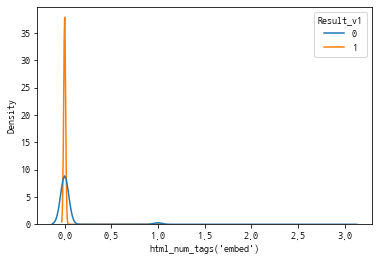

In [294]:
sns.kdeplot(x=feature, data = data, hue = target, common_norm = False) #nomalize
plt.show() 

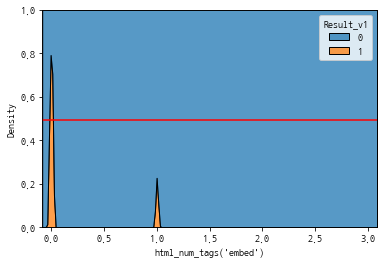

In [295]:
sns.kdeplot(x=feature, data = data, hue =target
            , multiple = 'fill')
plt.axhline(data[target].mean(), color = 'r')
plt.show()

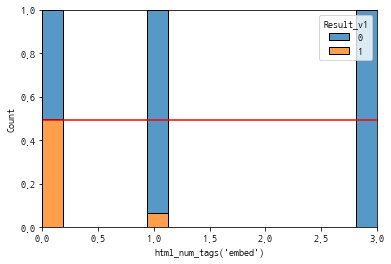

In [296]:
sns.histplot(x=feature, data = data, bins = 16
             , hue =target, multiple = 'fill')
plt.axhline(data[target].mean(), color = 'r')
plt.show()

In [297]:
temp = data.loc[data[feature].notnull(), ]
model = sm.Logit(temp[target], temp[feature])
result = model.fit()
print(result.pvalues)

Optimization terminated successfully.
         Current function value: 0.685429
         Iterations 7
html_num_tags('embed')    3.335172e-07
dtype: float64


### 15. html_num_tags('object')

In [298]:
feature = "html_num_tags('object')"

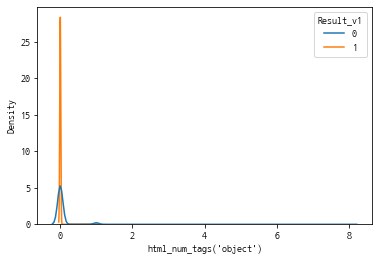

In [299]:
sns.kdeplot(x=feature, data = data, hue = target, common_norm = False) #nomalize
plt.show() 

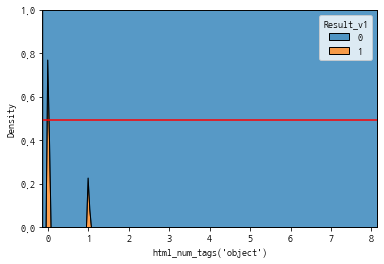

In [300]:
sns.kdeplot(x=feature, data = data, hue =target
            , multiple = 'fill')
plt.axhline(data[target].mean(), color = 'r')
plt.show()

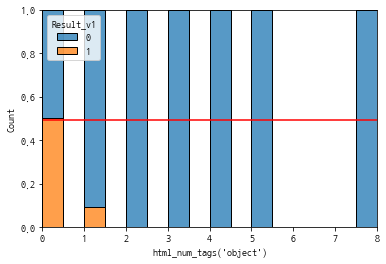

In [301]:
sns.histplot(x=feature, data = data, bins = 16
             , hue =target, multiple = 'fill')
plt.axhline(data[target].mean(), color = 'r')
plt.show()

In [302]:
temp = data.loc[data[feature].notnull(), ]
model = sm.Logit(temp[target], temp[feature])
result = model.fit()
print(result.pvalues)

Optimization terminated successfully.
         Current function value: 0.683457
         Iterations 7
html_num_tags('object')    4.489999e-09
dtype: float64


### 16. html_num_tags('div')

In [303]:
feature = "html_num_tags('div')"

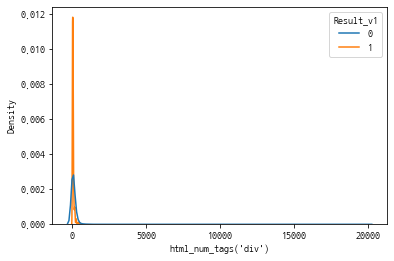

In [304]:
sns.kdeplot(x=feature, data = data, hue = target, common_norm = False) #nomalize
plt.show() 

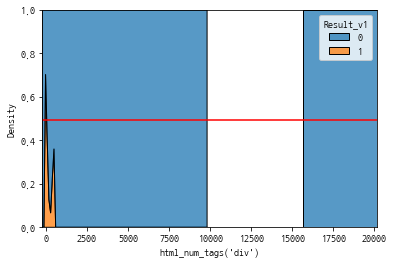

In [305]:
sns.kdeplot(x=feature, data = data, hue =target
            , multiple = 'fill')
plt.axhline(data[target].mean(), color = 'r')
plt.show()

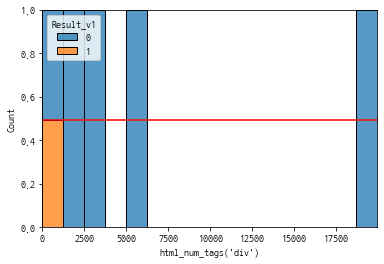

In [306]:
sns.histplot(x=feature, data = data, bins = 16
             , hue =target, multiple = 'fill')
plt.axhline(data[target].mean(), color = 'r')
plt.show()

In [307]:
temp = data.loc[data[feature].notnull(), ]
model = sm.Logit(temp[target], temp[feature])
result = model.fit()
print(result.pvalues)

Optimization terminated successfully.
         Current function value: 0.684338
         Iterations 6
html_num_tags('div')    3.421513e-12
dtype: float64


### 17. html_num_tags('head')

In [309]:
feature = "html_num_tags('head')"

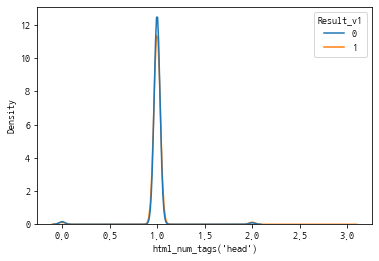

In [310]:
sns.kdeplot(x=feature, data = data, hue = target, common_norm = False) #nomalize
plt.show() 

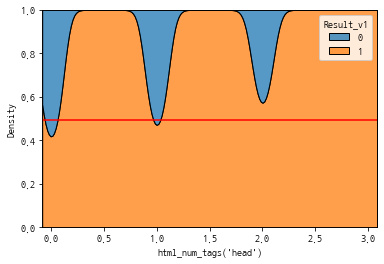

In [311]:
sns.kdeplot(x=feature, data = data, hue =target
            , multiple = 'fill')
plt.axhline(data[target].mean(), color = 'r')
plt.show()

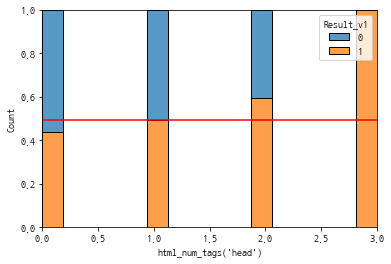

In [312]:
sns.histplot(x=feature, data = data, bins = 16
             , hue =target, multiple = 'fill')
plt.axhline(data[target].mean(), color = 'r')
plt.show()

In [313]:
temp = data.loc[data[feature].notnull(), ]
model = sm.Logit(temp[target], temp[feature])
result = model.fit()
print(result.pvalues)

Optimization terminated successfully.
         Current function value: 0.693091
         Iterations 3
html_num_tags('head')    0.522942
dtype: float64


### 18. html_num_tags('body')

In [314]:
feature = "html_num_tags('body')"

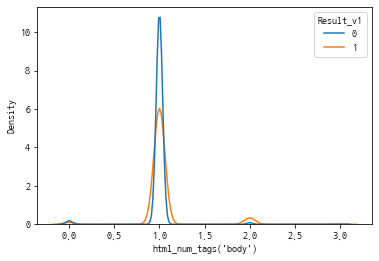

In [315]:
sns.kdeplot(x=feature, data = data, hue = target, common_norm = False) #nomalize
plt.show() 

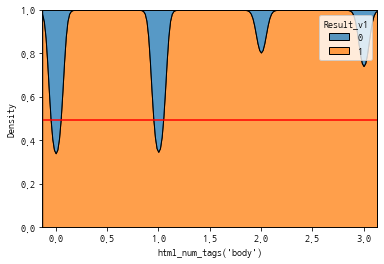

In [316]:
sns.kdeplot(x=feature, data = data, hue =target
            , multiple = 'fill')
plt.axhline(data[target].mean(), color = 'r')
plt.show()

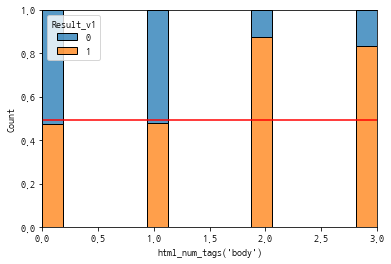

In [317]:
sns.histplot(x=feature, data = data, bins = 16
             , hue =target, multiple = 'fill')
plt.axhline(data[target].mean(), color = 'r')
plt.show()

In [318]:
temp = data.loc[data[feature].notnull(), ]
model = sm.Logit(temp[target], temp[feature])
result = model.fit()
print(result.pvalues)

Optimization terminated successfully.
         Current function value: 0.693095
         Iterations 3
html_num_tags('body')    0.5361
dtype: float64


### 19. html_num_tags('form')

In [319]:
feature = "html_num_tags('form')"

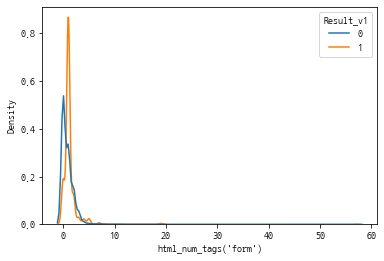

In [320]:
sns.kdeplot(x=feature, data = data, hue = target, common_norm = False) #nomalize
plt.show() 

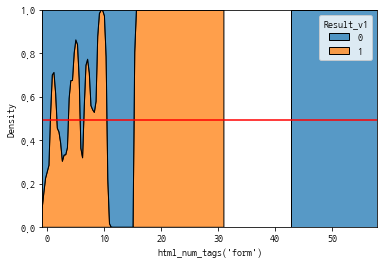

In [321]:
sns.kdeplot(x=feature, data = data, hue =target
            , multiple = 'fill')
plt.axhline(data[target].mean(), color = 'r')
plt.show()

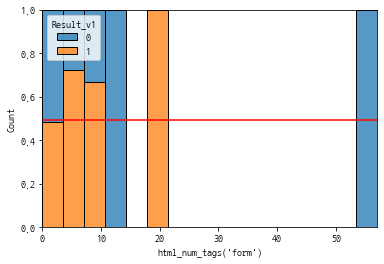

In [322]:
sns.histplot(x=feature, data = data, bins = 16
             , hue =target, multiple = 'fill')
plt.axhline(data[target].mean(), color = 'r')
plt.show()

In [323]:
temp = data.loc[data[feature].notnull(), ]
model = sm.Logit(temp[target], temp[feature])
result = model.fit()
print(result.pvalues)

Optimization terminated successfully.
         Current function value: 0.687717
         Iterations 5
html_num_tags('form')    3.166422e-09
dtype: float64


### 20. html_num_tags('a')

In [324]:
feature = "html_num_tags('a')"

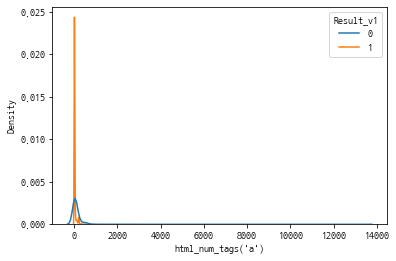

In [325]:
sns.kdeplot(x=feature, data = data, hue = target, common_norm = False) #nomalize
plt.show() 

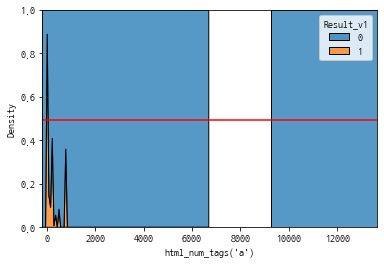

In [326]:
sns.kdeplot(x=feature, data = data, hue =target
            , multiple = 'fill')
plt.axhline(data[target].mean(), color = 'r')
plt.show()

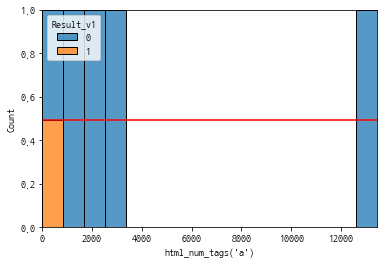

In [327]:
sns.histplot(x=feature, data = data, bins = 16
             , hue =target, multiple = 'fill')
plt.axhline(data[target].mean(), color = 'r')
plt.show()

In [328]:
temp = data.loc[data[feature].notnull(), ]
model = sm.Logit(temp[target], temp[feature])
result = model.fit()
print(result.pvalues)

Optimization terminated successfully.
         Current function value: 0.651146
         Iterations 7
html_num_tags('a')    2.897530e-39
dtype: float64


# <b>Step 2. 데이터 전처리
---

## <b>Q3. 중복 데이터 제거
### 우리가 접속하는 대부분의 웹사이트는 정상 사이트입니다.
### 또한, 특정 몇 개 사이트(ex. google, instagram, facebook 등)에 접속 빈도가 높습니다.
### 편중된 데이터는 모델 학습에 안 좋은 영향을 주기 때문에 중복 데이터 제거를 통해 해결합니다.
### 이 과정은 데이터 전처리 시 반드시 해야 하는 과정은 아니며, 프로젝트/데이터 성격에 맞게 결정하시면 됩니다.

### <span style="color:darkred">[문제1] df info()를 통해 데이터를 확인하고 중복된 데이터는 삭제해주세요. 삭제 후 info()를 통해 이전 데이터와 비교해 보세요.<span>

In [331]:
# 데이터 프레임의 info를 확인합니다.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3664 entries, 0 to 3663
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               3664 non-null   int64  
 1   url_len                  3664 non-null   float64
 2   url_num_hyphens_dom      3664 non-null   float64
 3   url_path_len             3664 non-null   float64
 4   url_domain_len           3664 non-null   float64
 5   url_hostname_len         3664 non-null   float64
 6   url_num_dots             3664 non-null   float64
 7   url_num_underscores      3664 non-null   float64
 8   url_query_len            3664 non-null   float64
 9   url_num_query_para       3664 non-null   float64
 10  url_ip_present           3664 non-null   float64
 11  url_entropy              3664 non-null   float64
 12  url_chinese_present      3664 non-null   float64
 13  url_port                 3664 non-null   float64
 14  html_num_tags('iframe') 

In [337]:
tmp_data = data.loc[:, ['url_domain_len', 'html_num_tags(\'iframe\')', 'html_num_tags(\'script\')']]

In [382]:
tmp_data = data.loc[:, ['url_num_hyphens_dom', 'url_num_underscores', 'url_domain_len', 'url_path_len', 'url_num_dots', 'url_ip_present', 'html_num_tags(\'iframe\')', 'html_num_tags(\'script\')', 'html_num_tags(\'embed\')', 'html_num_tags(\'object\')', 'html_num_tags(\'div\')', 'html_num_tags(\'form\')', 'html_num_tags(\'a\')']]

In [395]:
tmp = tmp_data.duplicated()

In [397]:
tmp.value_counts()

False    2634
True     1030
dtype: int64

In [393]:
index = tmp.loc[tmp == False].index

In [394]:
index

Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
            ...
            3651, 3652, 3653, 3655, 3656, 3657, 3658, 3659, 3660, 3663],
           dtype='int64', length=2634)

In [ ]:
data.drop_duplicates(['중복값확인하고싶은column이름'], keep = 'first')
출처: https://kimmaadata.tistory.com/7 [Data Scientist Kimmaa's log:티스토리]

In [399]:
columns = ['url_num_hyphens_dom', 'url_num_underscores', 'url_domain_len', 'url_path_len', 'url_num_dots', 'url_ip_present', 'html_num_tags(\'iframe\')', 'html_num_tags(\'script\')', 'html_num_tags(\'embed\')', 'html_num_tags(\'object\')', 'html_num_tags(\'div\')', 'html_num_tags(\'form\')', 'html_num_tags(\'a\')']
data = data.drop_duplicates(columns, keep = 'first')

In [400]:
# 데이터 프레임의 info를 확인합니다.
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2634 entries, 0 to 3663
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               2634 non-null   int64  
 1   url_len                  2634 non-null   float64
 2   url_num_hyphens_dom      2634 non-null   float64
 3   url_path_len             2634 non-null   float64
 4   url_domain_len           2634 non-null   float64
 5   url_hostname_len         2634 non-null   float64
 6   url_num_dots             2634 non-null   float64
 7   url_num_underscores      2634 non-null   float64
 8   url_query_len            2634 non-null   float64
 9   url_num_query_para       2634 non-null   float64
 10  url_ip_present           2634 non-null   float64
 11  url_entropy              2634 non-null   float64
 12  url_chinese_present      2634 non-null   float64
 13  url_port                 2634 non-null   float64
 14  html_num_tags('iframe') 

---

## <b>Q4. 텍스트와 범주형 특성 처리

### 기계가 데이터를 인식할 수 있도록 텍스트 데이터를 수치형 데이터로 변경합니다.
 - replace() 함수를 이용한 텍스트와 범주형 특성 처리

**<span style="color:green">[참고링크] 공식 Document**</span>

* replace(https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.replace.html)
* unique(https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.unique.html)

### <span style="color:blue">[예시] df_ex 데이터 프레임에서 replace 함수를 활용 'CA'는'California'로 'NY'는 'NewYork'으로 변경합니다.<span>

In [1]:
import pandas as pd

df_ex = pd.DataFrame({'name': ['Alice','Bob','Charlie','Dave','Ellen','Frank'],
                   'age': [24,42,18,68,24,30],
                   'state': ['NY','CA','CA','TX','CA','NY'],
                   'point': [64,24,70,70,88,57]}
                  )

print(df_ex)

      name  age state  point
0    Alice   24    NY     64
1      Bob   42    CA     24
2  Charlie   18    CA     70
3     Dave   68    TX     70
4    Ellen   24    CA     88
5    Frank   30    NY     57


### <span style="color:darkred">[문제2] replace() 함수를 활용 'benign'은 1로 'malicious'은 -1로 변경해주세요. 삭제 후 df['Result_v1'] 전후 데이터를 비교해 보세요.<span>

In [401]:
# 텍스트 데이터를 수치형 데이터로 변경 전 unique() 함수를 통해 유일한 값 확인
data['Result_v1'].unique()

array([1, 0], dtype=int64)

In [ ]:
# replace() 함수를 사용 텍스트 데이터를 수치형 데이터로 변경합니다.
data['Result_v1'] = data['Result_v1'].replace(1, -1)
data['Result_v1'].unique()

C:\Users\Wslee\AppData\Local\Temp/ipykernel_33164/2307925451.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Result_v1'] = data['Result_v1'].replace(1, -1)


array([-1,  0], dtype=int64)

In [404]:
data['Result_v1'] = data['Result_v1'].replace(0, 1)
data['Result_v1'].unique()

C:\Users\Wslee\AppData\Local\Temp/ipykernel_33164/3555994972.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Result_v1'] = data['Result_v1'].replace(0, 1)


array([-1,  1], dtype=int64)

In [405]:
# 텍스트 데이터를 수치형 데이터로 후 unique() 함수를 통해 유일한 값 확인
data['Result_v1'].unique()

array([-1,  1], dtype=int64)

In [406]:
data.head()

,Unnamed: 0,url_len,url_num_hyphens_dom,url_path_len,url_domain_len,url_hostname_len,url_num_dots,url_num_underscores,url_query_len,url_num_query_para,...,html_num_tags('script'),html_num_tags('embed'),html_num_tags('object'),html_num_tags('div'),html_num_tags('head'),html_num_tags('body'),html_num_tags('form'),html_num_tags('a'),html_num_tags('applet'),Result_v1
0,0,23.0,0.0,8.0,15.0,15.0,2.0,0.0,0.0,0.0,...,7.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,-1
1,1,75.0,0.0,58.0,17.0,17.0,6.0,0.0,0.0,0.0,...,18.0,0.0,0.0,20.0,1.0,1.0,0.0,21.0,0.0,1
2,2,20.0,0.0,4.0,16.0,16.0,2.0,0.0,0.0,0.0,...,33.0,0.0,0.0,101.0,1.0,1.0,3.0,70.0,0.0,1
3,3,27.0,0.0,13.0,14.0,14.0,3.0,0.0,0.0,0.0,...,15.0,0.0,0.0,151.0,1.0,1.0,1.0,55.0,0.0,1
4,4,39.0,2.0,12.0,27.0,27.0,2.0,0.0,0.0,0.0,...,10.0,0.0,0.0,332.0,1.0,1.0,0.0,321.0,0.0,1


---

## <b>Q5. 결측치 처리

### 데이터 수집 과정에서 발생한 오류 등으로 인해 결측치가 포함된 경우가 많습니다.
### 모델링 전에 결측치를 확인하고 이를 정제하는 과정은 필요합니다.

### <span style="color:darkred">[문제3] 결측치의 존재를 확인하고 결측치가 포함된 데이터를 처리해보세요.<span>

In [1]:
# 결축치의 존재를 확인합니다.

3   url_path_len             3663 non-null   float64
4   url_domain_len           3663 non-null   float64

이미 바꿈

In [2]:
# 결측치를 적절히 처리해줍니다.




In [2]:
# 결축치의 존재를 확인합니다.



---

## <b>Q6. 데이터 탐색을 통해 새로운 변수 추가 혹은 불필요한 변수 제거

### AI모델의 성능 향상을 위해 기존의 변수를 조합해 새로운 변수를 만들어 내기도 하고
### 데이터 분석을 통해 필요없는 변수는 삭제하는 과정이 필요 합니다.

### <span style="color:darkred">[문제4] 상관관계 함수 및 데이터 시각화 등을 활용하며 데이터셋을 분석하고 컬럼을 추가/삭제 해보세요.<span>

In [407]:
columns = ['Unnamed: 0', 'url_hostname_len', 'url_chinese_present', 'html_num_tags(\'applet\')']
data = data.drop(columns=columns, axis=1)

In [408]:
data.head()

,Unnamed: 0,url_len,url_num_hyphens_dom,url_path_len,url_domain_len,url_num_dots,url_num_underscores,url_query_len,url_num_query_para,url_ip_present,...,html_num_tags('iframe'),html_num_tags('script'),html_num_tags('embed'),html_num_tags('object'),html_num_tags('div'),html_num_tags('head'),html_num_tags('body'),html_num_tags('form'),html_num_tags('a'),Result_v1
0,0,23.0,0.0,8.0,15.0,2.0,0.0,0.0,0.0,0.0,...,0.0,7.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,-1
1,1,75.0,0.0,58.0,17.0,6.0,0.0,0.0,0.0,0.0,...,0.0,18.0,0.0,0.0,20.0,1.0,1.0,0.0,21.0,1
2,2,20.0,0.0,4.0,16.0,2.0,0.0,0.0,0.0,0.0,...,1.0,33.0,0.0,0.0,101.0,1.0,1.0,3.0,70.0,1
3,3,27.0,0.0,13.0,14.0,3.0,0.0,0.0,0.0,0.0,...,0.0,15.0,0.0,0.0,151.0,1.0,1.0,1.0,55.0,1
4,4,39.0,2.0,12.0,27.0,2.0,0.0,0.0,0.0,0.0,...,0.0,10.0,0.0,0.0,332.0,1.0,1.0,0.0,321.0,1


In [411]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2634 entries, 0 to 3663
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   url_len                  2634 non-null   float64
 1   url_num_hyphens_dom      2634 non-null   float64
 2   url_path_len             2634 non-null   float64
 3   url_domain_len           2634 non-null   float64
 4   url_num_dots             2634 non-null   float64
 5   url_num_underscores      2634 non-null   float64
 6   url_query_len            2634 non-null   float64
 7   url_num_query_para       2634 non-null   float64
 8   url_ip_present           2634 non-null   float64
 9   url_entropy              2634 non-null   float64
 10  url_port                 2634 non-null   float64
 11  html_num_tags('iframe')  2634 non-null   float64
 12  html_num_tags('script')  2634 non-null   float64
 13  html_num_tags('embed')   2634 non-null   float64
 14  html_num_tags('object') 

---

## <b>Q7. train_test_split을 이용하여, train_x, test_x, train_y, test_y로 데이터 분리

### 모델을 학습하는 데에는 Train 데이터만 사용해야 합니다.
### 학습에 사용하지 않은 데이터를 통해 모델을 평가해야 합니다.
### 그러기 위해 Train / Test 데이터로 분리합니다.


**<span style="color:green">[참고링크] 공식 Document**</span>

* train_test_split(https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)

### <span style="color:darkred">[문제5] train_test_split 함수를 사용하여 train 데이터와 test 데이터를 분리하고 각각의 shape를 확인하세요<span>

In [412]:
from sklearn.model_selection import train_test_split

target = 'Result_v1'
x = data.drop(target, axis = 1)
y = data.loc[:, target]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = .3, random_state = 2022)